<a href="https://colab.research.google.com/github/shirleyrutgers/DataVis/blob/main/PS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PS3
First draft of the final project: full blown story telling; due mar27
 1. tell a story with vis, say 1-10 graphs, the fewer the better!, focus on what the data are telling us, make it engaging and utilitarian/useful
 2. dont overcomplicate, best stories are simple (but be thorough, do the work, do robustness checks, triangulate, etc all of that in notebook, but then the story you tell and present is basic and simple, top of the iceberg, the choisest, the cream of the
 crop) its like top research say in nature or science its a page or two (but its based on say 20 or 50 pages of output in appendix or supplementray material)
 3. bar is higher than ps2

### Professor's Comment (Summary):  
- Loved the table showing unemployment and other indicators by county  
- Asked why both employment and unemployment were included  
- Highlighted the fascinating variability across NJ (North vs. South)  
- Suggested that business creation might drive GDP (not the other way around)  
- Recommended including business deaths for a full picture  
- Liked the side-by-side bar chart of GDP and business applications  
- Advised reviewing related literature on business formation and GDP  

### To Do (For PS3):  
- Add explanation for including both employment and unemployment  
- Mention regional contrasts between North and South NJ  
- Discuss business creation as a possible driver of GDP  
- Acknowledge exclusion of business deaths as a limitation  
- Keep side-by-side GDP and business applications chart  
- Add references to literature on business formation and GDP

#VIS PS1

PS1

1.  Explain why you use datasets youre using: abstract with res q and hypotheses; extend and improve as we go over time the writeup must be longer and include at least: why these data, whats the research questions, hypotheses and specific variables you are interested in and why?

### **Mini Abstract - Research Context and Data Justification**  

#### **Research Topic:**  
**The Relationship Between County GDP and Business Formation in New Jersey**  

#### **Research Question:**  
**Do counties with higher GDP levels have a greater number of business applications in New Jersey?**  

#### **Hypothesis:**  
Counties in New Jersey with higher GDP levels will exhibit a higher number of new business applications, as economic growth fosters entrepreneurship through increased access to capital, consumer demand, and business opportunities.  

#### **Why These Data?**  
To explore this relationship, we use three datasets:  
1. **bfs_county_apps_annual.xlsx** – Contains annual business application counts by county, allowing us to measure entrepreneurship levels.  
2. **NJCountyData.xlsx** – Provides GDP per county, essential for understanding economic strength.  
3. **NJwage.xlsx** – Includes wage data by county, which helps control for income effects on entrepreneurship.  

#### **Key Variables of Interest:**  
- **Business Applications (Dependent Variable):** Measures entrepreneurship activity.  
- **GDP per County (Independent Variable):** Represents economic development and financial capacity.  
- **Median Income & Wages (Control Variables):** Adjust for economic disparities affecting entrepreneurship.  

This study will contribute to understanding how regional economic conditions impact business formation, providing insights for policymakers and economic development strategies.

Data
NJCountyData (2025)> https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fwww.njeda.gov%2Fwp-content%2Fuploads%2F2021%2F05%2FNJCountyData-1.xlsx&wdOrigin=BROWSELINK

NJ data, population, gdp
https://docs.google.com/spreadsheets/d/e/2PACX-1vRCnEjufrgpP0UB0Quxx8nYC56Yw0C7ZuWMDjPj9H8BrUF8hPGSPBpmcGlJKc0xhA/pub?gid=2071317397&single=true&output=csv


Business Formation Statistics - Annual County Data
Business Applications by County (2025)

https://www.census.gov/econ/bfs/data/county.html

NJ business applications https://docs.google.com/spreadsheets/d/e/2PACX-1vSzhIWXDHIusT7myBctQLeKRlPvg7V7YVIweyIMU7W3I3NKX2UjTMNKPA995O1JTQ/pub?gid=1018220772&single=true&output=csv

NJ wage
https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fwww.nj.gov%2Flabor%2Flabormarketinformation%2Fassets%2FPDFs%2Femploy%2Fqcew%2Fcvremp23.xlsx&wdOrigin=BROWSELINK

https://docs.google.com/spreadsheets/d/e/2PACX-1vS8byZhwUGPcnozsRjz2WuI2lUIi84AweOFjg1lM0lSLpEzRQhK-NNBZdKZK9XoEw/pub?gid=69402389&single=true&output=csv




2.  Use at least 2 times each of the following in a way that makes sense and is useful:

 • rename var:
 • replace vals
 • drop or keep vars
 • collabse data (groupby agg)

In [1]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#this one and other magics (btw default is probably agg)
#%matplotlib nbagg
##https://www.marktechpost.com/2023/10/20/6-magic-commands-for-jupyter-notebooks-in-python-data-science/
#%%latex
#%ai
#%run
#%writefile
#%history -n

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

#sometimes have to install library which you get from https://pypi.org/
#!pip install geopandas

Step 1. Download file from online and save in colab

Data

NJ data, population, gdp
https://docs.google.com/spreadsheets/d/e/2PACX-1vRCnEjufrgpP0UB0Quxx8nYC56Yw0C7ZuWMDjPj9H8BrUF8hPGSPBpmcGlJKc0xhA/pub?gid=2071317397&single=true&output=csv


NJ business applications https://docs.google.com/spreadsheets/d/e/2PACX-1vSzhIWXDHIusT7myBctQLeKRlPvg7V7YVIweyIMU7W3I3NKX2UjTMNKPA995O1JTQ/pub?gid=1018220772&single=true&output=csv

NJ wage
https://docs.google.com/spreadsheets/d/e/2PACX-1vS8byZhwUGPcnozsRjz2WuI2lUIi84AweOFjg1lM0lSLpEzRQhK-NNBZdKZK9XoEw/pub?gid=69402389&single=true&output=csv

Sources:

Youtube tutorial. "Como importar CSV a Google Colab", (2025). https://www.youtube.com/watch?v=KCbpPhr_7DY

Youtube tutorial. "Dos alternativas para cargar un archivo CSV a nuestro colab", (2025). https://www.youtube.com/watch?v=pLAoxHXOeuk

In [2]:
import pandas as pd
df1 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRCnEjufrgpP0UB0Quxx8nYC56Yw0C7ZuWMDjPj9H8BrUF8hPGSPBpmcGlJKc0xhA/pub?gid=2071317397&single=true&output=csv')

In [3]:
df2=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSzhIWXDHIusT7myBctQLeKRlPvg7V7YVIweyIMU7W3I3NKX2UjTMNKPA995O1JTQ/pub?gid=1018220772&single=true&output=csv')

In [4]:
df3=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS8byZhwUGPcnozsRjz2WuI2lUIi84AweOFjg1lM0lSLpEzRQhK-NNBZdKZK9XoEw/pub?gid=69402389&single=true&output=csv')

In [5]:
df1.head()
df2.head()
df3.head()

,County,Employment,Unemployment,Population,GDP,Median Income
0,Atlantic,100709,12.5,"266,105",12593490,62678
1,Bergen,426341,7.6,"930,390",70158193,107971
2,Burlington,210681,6.6,"445,702",25725252,88443
3,Camden,229229,8.2,"506,738",23558717,73168
4,Cape May,39046,12.6,"93,086",5070716,66565


,State,County,County Code,fipstate,fipscty,BA2005,BA2006,BA2007,BA2008,BA2009,...,BA2014,BA2015,BA2016,BA2017,BA2018,BA2019,BA2020,BA2021,BA2022,BA2023
0,NJ,Atlantic County,34001,34,1,2281,2314,2336,2227,2050,...,2163,2161,2113,2195,2275,2501,3295,4082,3862,3885
1,NJ,Bergen County,34003,34,3,11218,11633,11833,11537,11091,...,11854,12345,12533,13497,14780,14225,15508,18500,17576,18508
2,NJ,Burlington County,34005,34,5,3816,3904,4103,3927,3470,...,3576,3601,3704,4084,4534,4732,5915,7617,6977,7703
3,NJ,Camden County,34007,34,7,3953,4322,4398,4336,3812,...,3855,3918,4107,4321,4740,5131,7073,8994,8030,8225
4,NJ,Cape May County,34009,34,9,1080,1002,962,915,774,...,803,1014,833,863,906,925,1052,1334,1284,1311


,County,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Atlantic,"$ 37,387","$ 38,568","$ 39,665","$ 40,362","$ 41,682","$ 42,850","$ 43,772","$ 49,306","$ 51,055","$ 52,852","$ 54,201"
1,Bergen,"$ 60,510","$ 62,191","$ 63,085","$ 63,323","$ 63,997","$ 65,378","$ 66,972","$ 73,426","$ 75,903","$ 77,278","$ 79,275"
2,Burlington,"$ 50,801","$ 51,597","$ 53,798","$ 53,456","$ 54,639","$ 56,829","$ 58,262","$ 64,983","$ 66,584","$ 67,974","$ 68,992"
3,Camden,"$ 47,212","$ 46,680","$ 49,078","$ 49,585","$ 51,162","$ 52,445","$ 54,335","$ 59,994","$ 62,506","$ 63,260","$ 64,846"
4,Cape May,"$ 30,578","$ 31,183","$ 32,361","$ 33,248","$ 33,359","$ 34,088","$ 35,378","$ 39,104","$ 41,103","$ 42,920","$ 44,209"


Rename

In [6]:
df1.rename(columns={"GDP": "Gross Domestic Product"}, inplace=True)

In [7]:
df1.head()

,County,Employment,Unemployment,Population,Gross Domestic Product,Median Income
0,Atlantic,100709,12.5,"266,105",12593490,62678
1,Bergen,426341,7.6,"930,390",70158193,107971
2,Burlington,210681,6.6,"445,702",25725252,88443
3,Camden,229229,8.2,"506,738",23558717,73168
4,Cape May,39046,12.6,"93,086",5070716,66565


In [8]:
df3.rename(columns={
    "2013": "Wage 2013",
    "2014": "Wage 2014",
    "2015": "Wage 2015",
    "2016": "Wage 2016",
    "2017": "Wage 2017",
    "2018": "Wage 2018",
    "2019": "Wage 2019",
    "2020": "Wage 2020",
    "2021": "Wage 2021",
    "2022": "Wage 2022",
    "2023": "Wage 2023"
}, inplace=True)

In [9]:
df3.head()

,County,Wage 2013,Wage 2014,Wage 2015,Wage 2016,Wage 2017,Wage 2018,Wage 2019,Wage 2020,Wage 2021,Wage 2022,Wage 2023
0,Atlantic,"$ 37,387","$ 38,568","$ 39,665","$ 40,362","$ 41,682","$ 42,850","$ 43,772","$ 49,306","$ 51,055","$ 52,852","$ 54,201"
1,Bergen,"$ 60,510","$ 62,191","$ 63,085","$ 63,323","$ 63,997","$ 65,378","$ 66,972","$ 73,426","$ 75,903","$ 77,278","$ 79,275"
2,Burlington,"$ 50,801","$ 51,597","$ 53,798","$ 53,456","$ 54,639","$ 56,829","$ 58,262","$ 64,983","$ 66,584","$ 67,974","$ 68,992"
3,Camden,"$ 47,212","$ 46,680","$ 49,078","$ 49,585","$ 51,162","$ 52,445","$ 54,335","$ 59,994","$ 62,506","$ 63,260","$ 64,846"
4,Cape May,"$ 30,578","$ 31,183","$ 32,361","$ 33,248","$ 33,359","$ 34,088","$ 35,378","$ 39,104","$ 41,103","$ 42,920","$ 44,209"


Replace

In [10]:
# Replace county names by removing "County"
df2["County"] = df2["County"].replace({
    "Atlantic County": "Atlantic",
    "Bergen County": "Bergen",
    "Burlington County": "Burlington",
    "Camden County": "Camden",
    "Cape May County": "Cape May",
    "Cumberland County": "Cumberland",
    "Essex County": "Essex",
    "Gloucester County": "Gloucester",
    "Hudson County": "Hudson",
    "Hunterdon County": "Hunterdon",
    "Mercer County": "Mercer",
    "Middlesex County": "Middlesex",
    "Monmouth County": "Monmouth",
    "Morris County": "Morris",
    "Ocean County": "Ocean",
    "Passaic County": "Passaic",
    "Salem County": "Salem",
    "Somerset County": "Somerset",
    "Sussex County": "Sussex",
    "Union County": "Union",
    "Warren County": "Warren"
})

# Verify the changes
print(df2.head())


  State      County  County Code  fipstate  fipscty  BA2005  BA2006  BA2007  \
0    NJ    Atlantic        34001        34        1    2281    2314    2336   
1    NJ      Bergen        34003        34        3   11218   11633   11833   
2    NJ  Burlington        34005        34        5    3816    3904    4103   
3    NJ      Camden        34007        34        7    3953    4322    4398   
4    NJ    Cape May        34009        34        9    1080    1002     962   

   BA2008  BA2009  ...  BA2014  BA2015  BA2016  BA2017  BA2018  BA2019  \
0    2227    2050  ...    2163    2161    2113    2195    2275    2501   
1   11537   11091  ...   11854   12345   12533   13497   14780   14225   
2    3927    3470  ...    3576    3601    3704    4084    4534    4732   
3    4336    3812  ...    3855    3918    4107    4321    4740    5131   
4     915     774  ...     803    1014     833     863     906     925   

   BA2020  BA2021  BA2022  BA2023  
0    3295    4082    3862    3885  
1   1550

In [11]:
# Replace "NJ" with "New Jersey" in the "State" column
df2["State"] = df2["State"].replace("NJ", "New Jersey")

# Display the first few rows to verify changes
print(df2.head())

        State      County  County Code  fipstate  fipscty  BA2005  BA2006  \
0  New Jersey    Atlantic        34001        34        1    2281    2314   
1  New Jersey      Bergen        34003        34        3   11218   11633   
2  New Jersey  Burlington        34005        34        5    3816    3904   
3  New Jersey      Camden        34007        34        7    3953    4322   
4  New Jersey    Cape May        34009        34        9    1080    1002   

   BA2007  BA2008  BA2009  ...  BA2014  BA2015  BA2016  BA2017  BA2018  \
0    2336    2227    2050  ...    2163    2161    2113    2195    2275   
1   11833   11537   11091  ...   11854   12345   12533   13497   14780   
2    4103    3927    3470  ...    3576    3601    3704    4084    4534   
3    4398    4336    3812  ...    3855    3918    4107    4321    4740   
4     962     915     774  ...     803    1014     833     863     906   

   BA2019  BA2020  BA2021  BA2022  BA2023  
0    2501    3295    4082    3862    3885  
1   

Drop or keep

In [12]:
# Keep only rows where "State" is "New Jersey"
df2 = df2[df2["State"] == "New Jersey"]

# Reset the index after filtering
df2 = df2.reset_index(drop=True)

# Display the first few rows to verify
print(df2.head())

        State      County  County Code  fipstate  fipscty  BA2005  BA2006  \
0  New Jersey    Atlantic        34001        34        1    2281    2314   
1  New Jersey      Bergen        34003        34        3   11218   11633   
2  New Jersey  Burlington        34005        34        5    3816    3904   
3  New Jersey      Camden        34007        34        7    3953    4322   
4  New Jersey    Cape May        34009        34        9    1080    1002   

   BA2007  BA2008  BA2009  ...  BA2014  BA2015  BA2016  BA2017  BA2018  \
0    2336    2227    2050  ...    2163    2161    2113    2195    2275   
1   11833   11537   11091  ...   11854   12345   12533   13497   14780   
2    4103    3927    3470  ...    3576    3601    3704    4084    4534   
3    4398    4336    3812  ...    3855    3918    4107    4321    4740   
4     962     915     774  ...     803    1014     833     863     906   

   BA2019  BA2020  BA2021  BA2022  BA2023  
0    2501    3295    4082    3862    3885  
1   

In [13]:
df2.head()

,State,County,County Code,fipstate,fipscty,BA2005,BA2006,BA2007,BA2008,BA2009,...,BA2014,BA2015,BA2016,BA2017,BA2018,BA2019,BA2020,BA2021,BA2022,BA2023
0,New Jersey,Atlantic,34001,34,1,2281,2314,2336,2227,2050,...,2163,2161,2113,2195,2275,2501,3295,4082,3862,3885
1,New Jersey,Bergen,34003,34,3,11218,11633,11833,11537,11091,...,11854,12345,12533,13497,14780,14225,15508,18500,17576,18508
2,New Jersey,Burlington,34005,34,5,3816,3904,4103,3927,3470,...,3576,3601,3704,4084,4534,4732,5915,7617,6977,7703
3,New Jersey,Camden,34007,34,7,3953,4322,4398,4336,3812,...,3855,3918,4107,4321,4740,5131,7073,8994,8030,8225
4,New Jersey,Cape May,34009,34,9,1080,1002,962,915,774,...,803,1014,833,863,906,925,1052,1334,1284,1311


In [14]:
# Drop the columns "County Code", "fipstate", and "fipscty"
df2 = df2.drop(columns=["County Code", "fipstate", "fipscty"], errors="ignore")

# Display the first few rows to verify changes
print(df2.head())

        State      County  BA2005  BA2006  BA2007  BA2008  BA2009  BA2010  \
0  New Jersey    Atlantic    2281    2314    2336    2227    2050    2159   
1  New Jersey      Bergen   11218   11633   11833   11537   11091   11437   
2  New Jersey  Burlington    3816    3904    4103    3927    3470    3515   
3  New Jersey      Camden    3953    4322    4398    4336    3812    3946   
4  New Jersey    Cape May    1080    1002     962     915     774     789   

   BA2011  BA2012  ...  BA2014  BA2015  BA2016  BA2017  BA2018  BA2019  \
0    2095    2117  ...    2163    2161    2113    2195    2275    2501   
1   11706   11650  ...   11854   12345   12533   13497   14780   14225   
2    3618    3510  ...    3576    3601    3704    4084    4534    4732   
3    3893    3895  ...    3855    3918    4107    4321    4740    5131   
4     843     881  ...     803    1014     833     863     906     925   

   BA2020  BA2021  BA2022  BA2023  
0    3295    4082    3862    3885  
1   15508   18500   

In [15]:
df2.head()

,State,County,BA2005,BA2006,BA2007,BA2008,BA2009,BA2010,BA2011,BA2012,...,BA2014,BA2015,BA2016,BA2017,BA2018,BA2019,BA2020,BA2021,BA2022,BA2023
0,New Jersey,Atlantic,2281,2314,2336,2227,2050,2159,2095,2117,...,2163,2161,2113,2195,2275,2501,3295,4082,3862,3885
1,New Jersey,Bergen,11218,11633,11833,11537,11091,11437,11706,11650,...,11854,12345,12533,13497,14780,14225,15508,18500,17576,18508
2,New Jersey,Burlington,3816,3904,4103,3927,3470,3515,3618,3510,...,3576,3601,3704,4084,4534,4732,5915,7617,6977,7703
3,New Jersey,Camden,3953,4322,4398,4336,3812,3946,3893,3895,...,3855,3918,4107,4321,4740,5131,7073,8994,8030,8225
4,New Jersey,Cape May,1080,1002,962,915,774,789,843,881,...,803,1014,833,863,906,925,1052,1334,1284,1311


Collapse data (groupby agg)

In [16]:
#Before using groupby().agg(), we need to clean the wage values by:

#Removing dollar signs ($) and commas (,)
#Converting them to numeric values

# Remove "$" and "," from wage columns and convert to numeric
df3.iloc[:, 1:] = df3.iloc[:, 1:].replace('[\$,]', '', regex=True).astype(float)

# Verify the conversion
print(df3.dtypes)  # Wages should now be float numbers

County       object
Wage 2013    object
Wage 2014    object
Wage 2015    object
Wage 2016    object
Wage 2017    object
Wage 2018    object
Wage 2019    object
Wage 2020    object
Wage 2021    object
Wage 2022    object
Wage 2023    object
dtype: object


In [17]:
# Collapse wages by county (calculating mean, min, max, and count across all years)
df3_collapsed = df3.set_index("County").agg(["mean", "min", "max", "count"])

# Flatten multi-index columns for clarity
df3_collapsed.columns = ['_'.join(map(str, col)) for col in df3_collapsed.columns]

# Reset index to keep "County" as a column
df3_collapsed.reset_index(inplace=True)

# Display the collapsed dataset
print(df3_collapsed)

   index  W_a_g_e_ _2_0_1_3  W_a_g_e_ _2_0_1_4  W_a_g_e_ _2_0_1_5  \
0   mean            53081.0       54229.619048        55816.47619   
1    min            30578.0       31183.000000        32361.00000   
2    max            82647.0       84480.000000        87243.00000   
3  count               21.0          21.000000           21.00000   

   W_a_g_e_ _2_0_1_6  W_a_g_e_ _2_0_1_7  W_a_g_e_ _2_0_1_8  W_a_g_e_ _2_0_1_9  \
0        56113.52381       57420.571429       58584.619048       60122.619048   
1        33248.00000       33359.000000       34088.000000       35378.000000   
2        86965.00000       86078.000000       89517.000000       91866.000000   
3           21.00000          21.000000          21.000000          21.000000   

   W_a_g_e_ _2_0_2_0  W_a_g_e_ _2_0_2_1  W_a_g_e_ _2_0_2_2  W_a_g_e_ _2_0_2_3  
0       65888.095238       67598.619048       69420.190476       71087.857143  
1       39104.000000       41103.000000       42920.000000       44209.000000  
2      1

In [18]:
df3_collapsed.head()

,index,W_a_g_e_ _2_0_1_3,W_a_g_e_ _2_0_1_4,W_a_g_e_ _2_0_1_5,W_a_g_e_ _2_0_1_6,W_a_g_e_ _2_0_1_7,W_a_g_e_ _2_0_1_8,W_a_g_e_ _2_0_1_9,W_a_g_e_ _2_0_2_0,W_a_g_e_ _2_0_2_1,W_a_g_e_ _2_0_2_2,W_a_g_e_ _2_0_2_3
0,mean,53081.0,54229.619048,55816.47619,56113.52381,57420.571429,58584.619048,60122.619048,65888.095238,67598.619048,69420.190476,71087.857143
1,min,30578.0,31183.000000,32361.00000,33248.00000,33359.000000,34088.000000,35378.000000,39104.000000,41103.000000,42920.000000,44209.000000
2,max,82647.0,84480.000000,87243.00000,86965.00000,86078.000000,89517.000000,91866.000000,100212.000000,101309.000000,102393.000000,104451.000000
3,count,21.0,21.000000,21.00000,21.00000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000


In [19]:
df2.head()

,State,County,BA2005,BA2006,BA2007,BA2008,BA2009,BA2010,BA2011,BA2012,...,BA2014,BA2015,BA2016,BA2017,BA2018,BA2019,BA2020,BA2021,BA2022,BA2023
0,New Jersey,Atlantic,2281,2314,2336,2227,2050,2159,2095,2117,...,2163,2161,2113,2195,2275,2501,3295,4082,3862,3885
1,New Jersey,Bergen,11218,11633,11833,11537,11091,11437,11706,11650,...,11854,12345,12533,13497,14780,14225,15508,18500,17576,18508
2,New Jersey,Burlington,3816,3904,4103,3927,3470,3515,3618,3510,...,3576,3601,3704,4084,4534,4732,5915,7617,6977,7703
3,New Jersey,Camden,3953,4322,4398,4336,3812,3946,3893,3895,...,3855,3918,4107,4321,4740,5131,7073,8994,8030,8225
4,New Jersey,Cape May,1080,1002,962,915,774,789,843,881,...,803,1014,833,863,906,925,1052,1334,1284,1311


In [20]:
import pandas as pd

# Rename "Último Valor" to "BA2023" to clearly indicate business applications in 2023
df2 = df2.rename(columns={"Último Valor": "BA2023"})

# Ensure "BA2023" is numeric for aggregation
df2["BA2023"] = pd.to_numeric(df2["BA2023"], errors="coerce")

# Compute the total sum and average of business applications in New Jersey for 2023
total_applications = df2["BA2023"].sum()
average_applications = df2["BA2023"].mean()

# Create a summary DataFrame
df2_summary = pd.DataFrame({
    "Metric": ["Total Applications", "Average Applications per County"],
    "BA2023": [total_applications, average_applications]
})

# Display the summary dataset
print(df2_summary)


                            Metric         BA2023
0               Total Applications  160117.000000
1  Average Applications per County    7624.619048


In [21]:
import pandas as pd

# Rename "Último Valor" to "BA2023"
df2 = df2.rename(columns={"Último Valor": "BA2023"})

# Ensure "BA2023" is numeric for aggregation
df2["BA2023"] = pd.to_numeric(df2["BA2023"], errors="coerce")

# Collapse data by applying sum and mean to BA2023
df2_collapsed = df2.agg({
    "BA2023": ["sum", "mean"]
})

# Rename index for clarity
df2_collapsed.index = ["Total Applications", "Average Applications per County"]

# Convert to DataFrame
df2_collapsed = df2_collapsed.reset_index()
df2_collapsed.columns = ["Metric", "BA2023"]

# Display the collapsed dataset
print(df2_collapsed)


                            Metric         BA2023
0               Total Applications  160117.000000
1  Average Applications per County    7624.619048


3. Merge at least 3 datasets (at least 2 merges); eg merge on geography (eg state), time (eg year), or some var (eg occupation)

In [22]:
df2_collapsed.head()

,Metric,BA2023
0,Total Applications,160117.000000
1,Average Applications per County,7624.619048


Merge

In [23]:
mergedOuter = pd.merge(df1, df2, how='outer', on=['County'],indicator=True) #outer=keep all
mergedOuter

,County,Employment,Unemployment,Population,Gross Domestic Product,Median Income,State,BA2005,BA2006,BA2007,...,BA2015,BA2016,BA2017,BA2018,BA2019,BA2020,BA2021,BA2022,BA2023,_merge
0,Atlantic,100709,12.5,"266,105",12593490,62678,New Jersey,2281,2314,2336,...,2161,2113,2195,2275,2501,3295,4082,3862,3885,both
1,Bergen,426341,7.6,"930,390",70158193,107971,New Jersey,11218,11633,11833,...,12345,12533,13497,14780,14225,15508,18500,17576,18508,both
2,Burlington,210681,6.6,"445,702",25725252,88443,New Jersey,3816,3904,4103,...,3601,3704,4084,4534,4732,5915,7617,6977,7703,both
3,Camden,229229,8.2,"506,738",23558717,73168,New Jersey,3953,4322,4398,...,3918,4107,4321,4740,5131,7073,8994,8030,8225,both
4,Cape May,39046,12.6,"93,086",5070716,66565,New Jersey,1080,1002,962,...,1014,833,863,906,925,1052,1334,1284,1311,both
5,Cumberland,58005,9.7,"151,906",6007622,54179,New Jersey,922,1043,982,...,964,976,1035,983,1169,1496,1983,1877,1982,both
6,Essex,326411,9.9,"795,404",52070494,64522,New Jersey,8744,9321,9401,...,10179,10820,11957,12988,14072,18866,21361,18122,18476,both
7,Gloucester,136373,7.5,"291,165",14017096,87996,New Jersey,2142,2159,2263,...,1855,2032,2099,2244,2268,2981,3826,3666,3977,both
8,Hudson,317844,8.7,"670,046",43847173,77738,New Jersey,6334,6458,6722,...,7720,8050,8585,9008,9512,11378,13484,13100,14321,both
9,Hunterdon,57934,5.9,"124,823",6820939,117275,New Jersey,1326,1364,1412,...,1133,1133,1319,1338,1256,1334,1612,1601,1674,both


Explanation

The merge between df1 (socioeconomic indicators) and df2 (business applications) was successful, with all records classified as "both", meaning every county matched perfectly. This ensures a complete integration of socioeconomic data and business applications, allowing for a direct analysis of how economic factors influence business formation in New Jersey without data loss.

Why Did the Merge Work Perfectly?
You merged df1 and df2 on "County".
Every county in df1 (socioeconomic data) had a matching county in df2 (business applications).
Since all counties matched, every row in the merged dataset was classified as "both" under _merge.

What Does "both" Mean?
In Pandas' merge operation, the _merge column tells you where the data came from:

"left_only" → Exists only in df1 (socioeconomic indicators).
"right_only" → Exists only in df2 (business applications).
"both" → Exists in both datasets (perfect match).

In [24]:
# Merge df2 (business applications) with df3 (wages) on "County"
#merged_df = pd.merge(df2, df3, how="outer", on="County", indicator=True)

mergedOuter2 = pd.merge(df2, df3, how='outer', on=['County'],indicator=True) #outer=keep all
mergedOuter2

,State,County,BA2005,BA2006,BA2007,BA2008,BA2009,BA2010,BA2011,BA2012,...,Wage 2015,Wage 2016,Wage 2017,Wage 2018,Wage 2019,Wage 2020,Wage 2021,Wage 2022,Wage 2023,_merge
0,New Jersey,Atlantic,2281,2314,2336,2227,2050,2159,2095,2117,...,39665.0,40362.0,41682.0,42850.0,43772.0,49306.0,51055.0,52852.0,54201.0,both
1,New Jersey,Bergen,11218,11633,11833,11537,11091,11437,11706,11650,...,63085.0,63323.0,63997.0,65378.0,66972.0,73426.0,75903.0,77278.0,79275.0,both
2,New Jersey,Burlington,3816,3904,4103,3927,3470,3515,3618,3510,...,53798.0,53456.0,54639.0,56829.0,58262.0,64983.0,66584.0,67974.0,68992.0,both
3,New Jersey,Camden,3953,4322,4398,4336,3812,3946,3893,3895,...,49078.0,49585.0,51162.0,52445.0,54335.0,59994.0,62506.0,63260.0,64846.0,both
4,New Jersey,Cape May,1080,1002,962,915,774,789,843,881,...,32361.0,33248.0,33359.0,34088.0,35378.0,39104.0,41103.0,42920.0,44209.0,both
5,New Jersey,Cumberland,922,1043,982,933,837,822,812,865,...,40951.0,41038.0,41775.0,42780.0,43714.0,47563.0,49617.0,51997.0,53218.0,both
6,New Jersey,Essex,8744,9321,9401,8942,8676,9327,9766,9815,...,63197.0,64966.0,66718.0,68966.0,71042.0,77955.0,79140.0,80567.0,82810.0,both
7,New Jersey,Gloucester,2142,2159,2263,2096,1860,1895,1854,1831,...,42778.0,43404.0,43661.0,44692.0,45364.0,49010.0,51156.0,52568.0,54471.0,both
8,New Jersey,Hudson,6334,6458,6722,6914,6360,7051,7711,7486,...,72715.0,72935.0,76401.0,79307.0,79639.0,87551.0,90443.0,93112.0,94413.0,both
9,New Jersey,Hunterdon,1326,1364,1412,1351,1267,1259,1261,1281,...,62093.0,62442.0,68166.0,66403.0,66196.0,70503.0,72033.0,72274.0,72843.0,both


Explanation

The merge between **df2 (business applications)** and **df3 (wages)** was successful, with all records classified as **"both"**, meaning every county matched perfectly in both datasets. This ensures a **complete integration** of business application data and wage information, allowing for a **direct analysis** of how wages relate to business formation in New Jersey without any data loss.

References

https://github.com/theaok/vis/blob/main/all.ipynb

ChatGpt

Youtube tutorial. "Como importar CSV a Google Colab", (2025). https://www.youtube.com/watch?v=KCbpPhr_7DY
Youtube tutorial. "Dos alternativas para cargar un archivo CSV a nuestro colab", (2025). https://www.youtube.com/watch?v=pLAoxHXOeuk

# VIS PS2

##Total application to open new business in New Jersey

In [25]:
df2_collapsed[:10].style.background_gradient(cmap='Greens').format(precision=2)

,Metric,BA2023
0,Total Applications,160117.00
1,Average Applications per County,7624.62


Explanation> the total application to open new business in New Jersey is in average 7624.62, but the total are 160117.00 and that could be because some county have higher number of application than others.

In [26]:
df2_collapsed[:5].style.text_gradient(cmap='Blues').format(precision=2) #maybe better more delicate

,Metric,BA2023
0,Total Applications,160117.00
1,Average Applications per County,7624.62


Explanation> diferent format, same results. Explanation> the total application to open new business in New Jersey is in average 7624.62, but the total are 160117.00 and that could be because some county have higher number of application than others.

##Socioeconomical Data> County, Employment, Unemployment, Population, Gross Domestic Product, Median Income

In [27]:
df1[:10].style.background_gradient(cmap='Greens').format(precision=2)

,County,Employment,Unemployment,Population,Gross Domestic Product,Median Income
0,Atlantic,100709,12.50,"266,105",12593490,62678
1,Bergen,426341,7.60,"930,390",70158193,107971
2,Burlington,210681,6.60,"445,702",25725252,88443
3,Camden,229229,8.20,"506,738",23558717,73168
4,Cape May,39046,12.60,"93,086",5070716,66565
5,Cumberland,58005,9.70,"151,906",6007622,54179
6,Essex,326411,9.90,"795,404",52070494,64522
7,Gloucester,136373,7.50,"291,165",14017096,87996
8,Hudson,317844,8.70,"670,046",43847173,77738
9,Hunterdon,57934,5.90,"124,823",6820939,117275


Explanations> a table to explore the data in a better visual way. with mostly all the variables of the research in columns. Dark green for higher level of data values.

In [28]:
df1[:5].style.text_gradient(cmap='Blues').format(precision=2) #maybe better more delicate

,County,Employment,Unemployment,Population,Gross Domestic Product,Median Income
0,Atlantic,100709,12.50,"266,105",12593490,62678
1,Bergen,426341,7.60,"930,390",70158193,107971
2,Burlington,210681,6.60,"445,702",25725252,88443
3,Camden,229229,8.20,"506,738",23558717,73168
4,Cape May,39046,12.60,"93,086",5070716,66565


Explanations> a table to explore the data in a better visual way. with mostly all the variables of the research in columns.

In [29]:
df1[:10].style.bar(subset=pd.IndexSlice[:, ['Gross Domestic Product', 'Unemployment']], color='#d65f5f').format(precision=2) #bar chart
# Use pd.IndexSlice to correctly specify columns within the subset argument
# per html col visualizer (and rgb equivalents) eg htmlcolorcodes.com

,County,Employment,Unemployment,Population,Gross Domestic Product,Median Income
0,Atlantic,100709,12.50,"266,105",12593490,62678
1,Bergen,426341,7.60,"930,390",70158193,107971
2,Burlington,210681,6.60,"445,702",25725252,88443
3,Camden,229229,8.20,"506,738",23558717,73168
4,Cape May,39046,12.60,"93,086",5070716,66565
5,Cumberland,58005,9.70,"151,906",6007622,54179
6,Essex,326411,9.90,"795,404",52070494,64522
7,Gloucester,136373,7.50,"291,165",14017096,87996
8,Hudson,317844,8.70,"670,046",43847173,77738
9,Hunterdon,57934,5.90,"124,823",6820939,117275


Explanations> a chart to explore the data in a better visual way. with mostly all the variables of the research in columns. We can see easyly when each county have higher values of each variables. Highlighted in red are the variables GDP and Unemployment.

In [30]:
df1[:10].style.bar(subset=['Gross Domestic Product', 'Employment'], color='#d65f5f').format(precision=2) #bar chart
# per html col visualizer (and rgb equivalents) eg htmlcolorcodes.com

,County,Employment,Unemployment,Population,Gross Domestic Product,Median Income
0,Atlantic,100709,12.50,"266,105",12593490,62678
1,Bergen,426341,7.60,"930,390",70158193,107971
2,Burlington,210681,6.60,"445,702",25725252,88443
3,Camden,229229,8.20,"506,738",23558717,73168
4,Cape May,39046,12.60,"93,086",5070716,66565
5,Cumberland,58005,9.70,"151,906",6007622,54179
6,Essex,326411,9.90,"795,404",52070494,64522
7,Gloucester,136373,7.50,"291,165",14017096,87996
8,Hudson,317844,8.70,"670,046",43847173,77738
9,Hunterdon,57934,5.90,"124,823",6820939,117275


Same bar graph. Highlighted in red are the variables GDP and Employment.

##To export as html

In [31]:
#and can export it to_html() and download onto hard drive
html = df2_collapsed.style.background_gradient(cmap="hot").to_html() #Reds Greens
f = open('df2_collapsed.html','w'); f.write(html); f.close() #can have multiple commands in one line with ';'
files.download('df2_collapsed.html') #your os will probably prompt you to open in webbrowser, do it

###to excel (i'd just stick with html) https://betterdatascience.com/style-pandas-dataframes/
#df2_collapsed.style.background_gradient(cmap="hot").to_excel("table.xlsx"); files.download('table.xlsx')

981

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Explanations> convert into html, Usefull to download and share a specific graphic.

In [32]:
#and can export it to_html() and download onto hard drive
html = df1.style.background_gradient(cmap="hot").to_html() #Reds Greens
f = open('df1.html','w'); f.write(html); f.close() #can have multiple commands in one line with ';'
files.download('df1.html') #your os will probably prompt you to open in webbrowser, do it

###to excel (i'd just stick with html) https://betterdatascience.com/style-pandas-dataframes/
#df1.style.background_gradient(cmap="hot").to_excel("table.xlsx"); files.download('table.xlsx')

16544

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Explanations> convert into html, Usefull to download and share a specific graphic.

##Correlation between all variables included in df1, GDP, Employment, Population, Median Income and Unemployment.

In the next steps, correlation table between all variables included in df1, GDP, Employment, Population, Median Income and Unemployment.

First I need to review what type of data are in my dataframe of my interest, df1. I see I have int64 and float64. The others are object because County are the Unit of analysis and category, also there is a information about Population, here appear as a object, but for now we will no use this variable. I just want to review my Int64 data types.

In [33]:
df1.dtypes

,0
County,object
Employment,int64
Unemployment,float64
Population,object
Gross Domestic Product,int64
Median Income,int64


In [34]:
df1.select_dtypes(include=['int64'])

,Employment,Gross Domestic Product,Median Income
0,100709,12593490,62678
1,426341,70158193,107971
2,210681,25725252,88443
3,229229,23558717,73168
4,39046,5070716,66565
5,58005,6007622,54179
6,326411,52070494,64522
7,136373,14017096,87996
8,317844,43847173,77738
9,57934,6820939,117275


Explanations> type of data int64, I can build any type of graphics like bars or scatterplot because are continuos variables. Later we can sort and see the correlations.

In [35]:
#Correlation Matrix
#can color any table output, say corr matrix
df1.select_dtypes(include=['int64','float64']).corr().style.background_gradient(cmap='RdYlGn').format(precision=2)

,Employment,Unemployment,Gross Domestic Product,Median Income
Employment,1.00,-0.22,0.91,0.21
Unemployment,-0.22,1.00,-0.27,-0.73
Gross Domestic Product,0.91,-0.27,1.00,0.35
Median Income,0.21,-0.73,0.35,1.00


Explanations> correlation matirx in the table. (corr -1 to 1)

The correlation between independents variables of the model.

* Employment and Unemployment> negative, inverse and low
* Employment and GDP> positive, direct and high
* Employment and median income> positive, direct and low
* Unemployment and median income> negative, inverse and high
* GDP and median income> positive, direct and low
A priori, we can see a high correlation between GDP and employment, and a very high negative correlation between unemployment and median income. If the economy grow, the employment is higher, the median income too, so the unemployment rate will be lower. With all these data we can re-think about if there are some multicolineality in the model to try explain the creation of New Business in New Jersey.


(array([4., 4., 4., 2., 2., 2., 1., 0., 0., 2.]),
 array([ 5.9 ,  6.57,  7.24,  7.91,  8.58,  9.25,  9.92, 10.59, 11.26,
        11.93, 12.6 ]),
 <BarContainer object of 10 artists>)

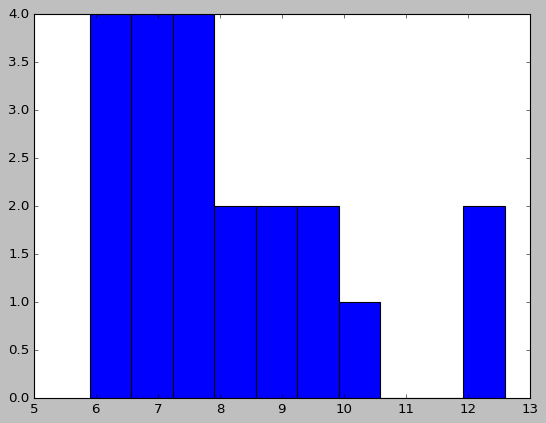

In [36]:
#remember we did: import matplotlib.pyplot as plt
#and so the fastest/easiest is to do

plt.hist(df1.Unemployment)

Explanation> histogram. there are more countys which have less rate of unemployment, in the range 6 to 8%. But also 2 countys have higher level of unemployment, Atlantic City 12.50% and Cape May 12.60%.

(array([6., 1., 1., 1., 3., 4., 1., 2., 0., 2.]),
 array([ 26626. ,  66597.5, 106569. , 146540.5, 186512. , 226483.5,
        266455. , 306426.5, 346398. , 386369.5, 426341. ]),
 <BarContainer object of 10 artists>)

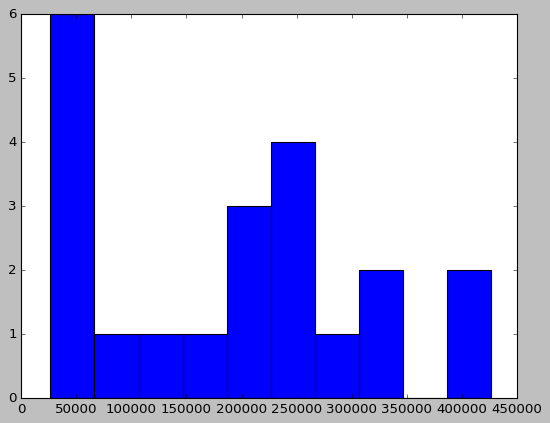

In [37]:
#remember we did: import matplotlib.pyplot as plt
#and so the fastest/easiest is to do

plt.hist(df1.Employment)


Explanation> histogram. there are more countys, 6 in total, who have Employment level at 50,000. Then, 4 countys who have at 250,000. The rest of the countys have different levels of employment number.



Next> to build histograms of variables from dataframe 1.

(array([6., 2., 3., 1., 3., 1., 2., 1., 1., 1.]),
 array([ 3911548. , 10536212.5, 17160877. , 23785541.5, 30410206. ,
        37034870.5, 43659535. , 50284199.5, 56908864. , 63533528.5,
        70158193. ]),
 <BarContainer object of 10 artists>)

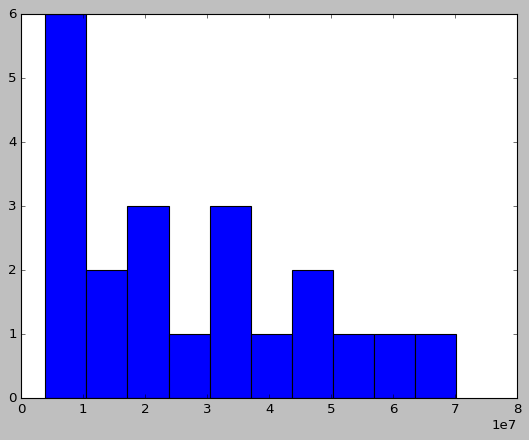

In [38]:
#remember we did: import matplotlib.pyplot as plt
#remember we did: import matplotlib.pyplot as plt
#and so the fastest/easiest is to do

plt.hist(df1['Gross Domestic Product'])

Explanation> histogram. Gross Domestic Product. More countys (6) have less level of GDP. Less countys have highers levels of GDP. So, I need to create a graph where can I see the GDP of each countys, sorting by USD per county.




Text(0.5, 0, 'Employment')

Text(0, 0.5, 'Gross Domestic Product')

(array([6., 1., 1., 1., 3., 4., 1., 2., 0., 2.]),
 array([ 26626. ,  66597.5, 106569. , 146540.5, 186512. , 226483.5,
        266455. , 306426.5, 346398. , 386369.5, 426341. ]),
 <BarContainer object of 10 artists>)

(0.0, 500000.0)

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

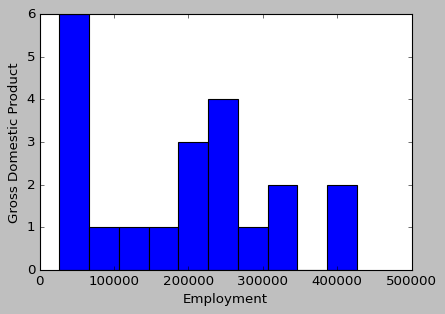

In [39]:

#oneliner quick setup:
fig, ax = plt.subplots(figsize = (6,4)) #fig=overall environemnt; ax(s)=actual plot(s)

#ax.set_title('my title')
ax.set_xlabel("Employment")  #remember always all axes must be labelled
ax.set_ylabel("Gross Domestic Product")
#put some plot in it, eg:
ax.hist(df1.Employment); #,alpha=.5,bins=20,color='blue'

#ax.scatter(auto.price,auto.weight, c='black', s=30, alpha=0.3)
#ax.legend(["blah"],loc=0) #0 soft decides; 1-4 corners; more options
#ax.set_ylim([0,50])
ax.set_xlim([0,500000])
#ax.set_xticks([10, 20, 50])
#ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$'], fontsize=18)
plt.gcf().canvas.get_supported_filetypes() #list supported output/save formats
plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as
#plt.show() #may need it depends on os/interface/browser #semilcolon supreses intermediary output

Explanation> Histogram about Employment and GDP. Countys who have less than 100,000 number of employment have higher GDP. And also, countys who have less level of Employment number have less level of GDP.

Text(0.5, 0, 'Unemployment')

Text(0, 0.5, 'Gross Domestic Product')

(array([4., 4., 4., 2., 2., 2., 1., 0., 0., 2.]),
 array([ 5.9 ,  6.57,  7.24,  7.91,  8.58,  9.25,  9.92, 10.59, 11.26,
        11.93, 12.6 ]),
 <BarContainer object of 10 artists>)

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

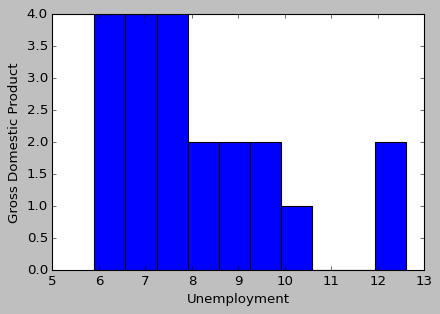

In [40]:

#oneliner quick setup:
fig, ax = plt.subplots(figsize = (6,4)) #fig=overall environemnt; ax(s)=actual plot(s)

#ax.set_title('my title')
ax.set_xlabel("Unemployment")  #remember always all axes must be labelled
ax.set_ylabel("Gross Domestic Product")
#put some plot in it, eg:
ax.hist(df1.Unemployment); #,alpha=.5,bins=20,color='blue'

#ax.scatter(auto.price,auto.weight, c='black', s=30, alpha=0.3)
#ax.legend(["blah"],loc=0) #0 soft decides; 1-4 corners; more options
#ax.set_ylim([0,50])
#ax.set_xlim([0,50])
#ax.set_xticks([10, 20, 50])
#ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$'], fontsize=18)
plt.gcf().canvas.get_supported_filetypes() #list supported output/save formats
plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as
#plt.show() #may need it depends on os/interface/browser #semilcolon supreses intermediary output

Explanation> Histogram about Unemployment and GDP. Countys who have less than a rate of 8% of unemployment have higher GDP. And also, countys who have higher level of Unemployment rate have less level of GDP, and this coul be an outlier (Atlantic city and Cape May)




In [41]:
df1.columns

Index(['County', 'Employment', 'Unemployment', 'Population',
       'Gross Domestic Product', 'Median Income'],
      dtype='object')

<Figure size 720x480 with 0 Axes>

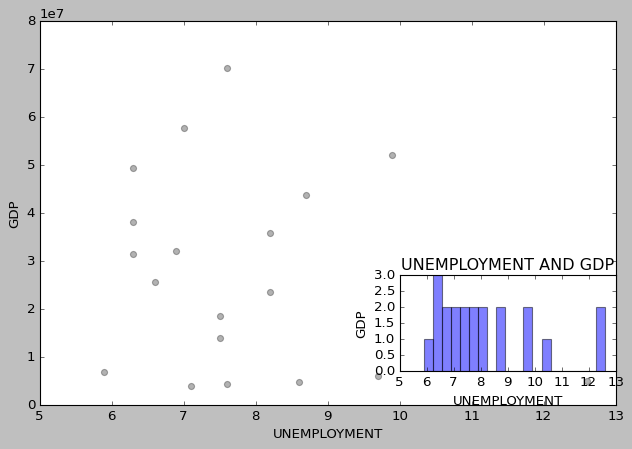

In [42]:
#inset figure love it! looks like nature or science
# instead of oneliner setup, step by step:
fig = plt.figure(figsize=(9,6)) #plots in matplotlib reside within a Figure object
# add axes: left, bottom, width, height (range 0 to 1) #ax = plt.axes() #make axes
#[a,b,c,d] (a,b): point in southwest corner of the rectangle; c=width; d= height
#ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
#inset figure love it! looks like nature or science
# instead of oneliner setup, step by step:
fig = plt.figure(figsize=(9,6)) #plots in matplotlib reside within a Figure object
# add axes: left, bottom, width, height (range 0 to 1) #ax = plt.axes() #make axes
#[a,b,c,d] (a,b): point in southwest corner of the rectangle; c=width; d= height
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
ax2 = fig.add_axes([0.6, 0.17, 0.3, 0.2]) # inset axes
# main figure
ax1.scatter(df1.Unemployment, df1['Gross Domestic Product'], c='black', s=30, alpha=0.3)
ax1.set_xlabel('UNEMPLOYMENT')
ax1.set_ylabel('GDP')
# inset
ax2.hist(df1.Unemployment,alpha=.5,bins=20,color='blue')
ax2.set_xlabel('UNEMPLOYMENT')
ax2.set_ylabel('GDP')
ax2.set_title('UNEMPLOYMENT AND GDP');


Explanation> histogram. Gross Domestic Product. More countys (6) have less level of GDP. Less countys have highers levels of GDP.

Here in this graphic> scatter plot and no perfect relationship is seen, the points are very dispersed and there is no visible pattern of correlation.

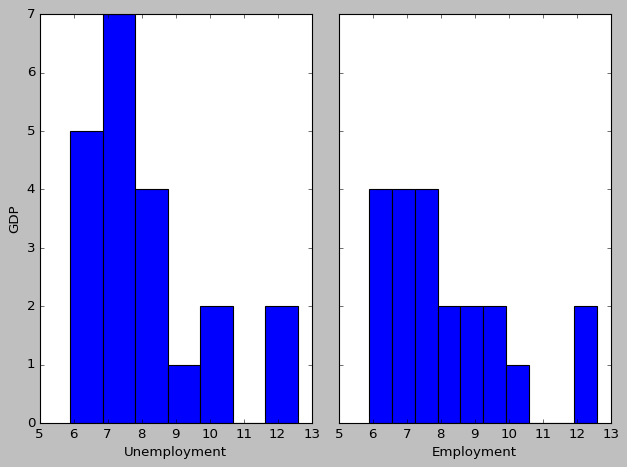

In [43]:
#subplots
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True) #1row2col
axs[0].hist(df1.Unemployment, bins=7) #edgecolor="black" ,color="green" histtype=u'step' alpha=.5
#btw can do categorical var hist too: df1.Unemployment.value_counts() #same as bar chart
axs[1].hist(df1.Unemployment)
axs[0].set_ylabel('GDP')
axs[0].set_xlabel('Unemployment');
axs[1].set_xlabel('Employment')
axs[1].set_xlabel('Employment');

##alt
#fig = plt.figure()
#plt.subplots_adjust(hspace=0.2) #adjust horiz space between graphs
#ax1 = plt.subplot(211, title='UNEMPLOYMENT AND GDP') #2x1grid 1st graph
#plt.scatter(df1[df1.County=='Camden'].weight, df1[df1.County=='Camden'].length)
#ax2 = plt.subplot(212, sharex=ax1, sharey=ax1, title='doemstic') #2x1grid 2nd graph
#plt.scatter(df1[df1.County=='Camden'].weight, df1[df1.County=='Camden'].length)
#xticklabels = ax1.get_xticklabels() #+ ax2.get_xticklabels() #drop labelling of 1st x axis
#plt.setp(xticklabels, visible=False)

Same explanation of histograms, 2 variables, Employment and Unemployment in x, GDP in y.

##Scatter Plot to see relationship between our variables from the H0

Scatter plot I will use to helps visualize if there is a relationship between our variables from the H0> business applications and GDP, and the control variable Wage.
First, review the merged tables created before (PS1)

First, I need to check the database I will use, that is the merged one. mergedOuter

In [44]:
mergedOuter.head()

,County,Employment,Unemployment,Population,Gross Domestic Product,Median Income,State,BA2005,BA2006,BA2007,...,BA2015,BA2016,BA2017,BA2018,BA2019,BA2020,BA2021,BA2022,BA2023,_merge
0,Atlantic,100709,12.5,"266,105",12593490,62678,New Jersey,2281,2314,2336,...,2161,2113,2195,2275,2501,3295,4082,3862,3885,both
1,Bergen,426341,7.6,"930,390",70158193,107971,New Jersey,11218,11633,11833,...,12345,12533,13497,14780,14225,15508,18500,17576,18508,both
2,Burlington,210681,6.6,"445,702",25725252,88443,New Jersey,3816,3904,4103,...,3601,3704,4084,4534,4732,5915,7617,6977,7703,both
3,Camden,229229,8.2,"506,738",23558717,73168,New Jersey,3953,4322,4398,...,3918,4107,4321,4740,5131,7073,8994,8030,8225,both
4,Cape May,39046,12.6,"93,086",5070716,66565,New Jersey,1080,1002,962,...,1014,833,863,906,925,1052,1334,1284,1311,both


I will use seaborn.scatterplot() to visualize the relationship.
X-axis: Gross Domestic Product (GDP).And
Y-axis: Business Applications in 2023 (BA2023).

<Figure size 640x400 with 0 Axes>

<Axes: xlabel='Gross Domestic Product', ylabel='BA2023'>

Text(0.5, 0, 'Gross Domestic Product (GDP)')

Text(0, 0.5, 'Business Applications in 2023 (BA2023)')

Text(0.5, 1.0, 'Scatter Plot: GDP vs Business Applications in NJ (2023)')

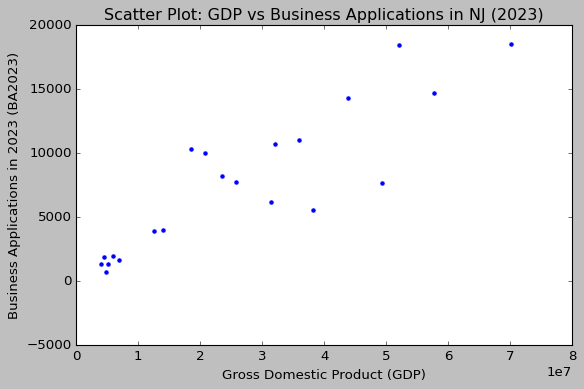

In [45]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Gross Domestic Product vs. Business Applications (BA2023)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=mergedOuter, x="Gross Domestic Product", y="BA2023")

# Add labels and title
plt.xlabel("Gross Domestic Product (GDP)")
plt.ylabel("Business Applications in 2023 (BA2023)")
plt.title("Scatter Plot: GDP vs Business Applications in NJ (2023)")

# Show the plot
plt.show()


Explanation> In this scatter plot you can see a strong, upward positive relationship between> Gross Domestic Product and Business Applications in 2023 in New Jersey.

The higher the GDP, the higher the level of business creation in New Jersey.

##Scatter Plot: GDP vs Business Applications in NJ (2023) with Trend Line

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='Gross Domestic Product', ylabel='BA2023'>

<Axes: xlabel='Gross Domestic Product', ylabel='BA2023'>

Text(0.5, 0, 'Gross Domestic Product (GDP)')

Text(0, 0.5, 'Business Applications in 2023 (BA2023)')

Text(0.5, 1.0, 'Scatter Plot: GDP vs Business Applications in NJ (2023) with Trend Line')

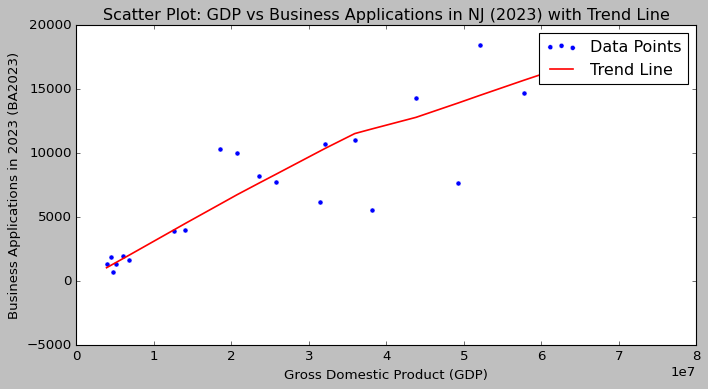

In [46]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 5))

# Scatter plot: GDP vs Business Applications (BA2023)
sns.scatterplot(data=mergedOuter, x="Gross Domestic Product", y="BA2023", label="Data Points")

# Add a trend line using regplot
sns.regplot(data=mergedOuter, x="Gross Domestic Product", y="BA2023", scatter=False, lowess=True, color='red', label="Trend Line")

# Add labels and title
plt.xlabel("Gross Domestic Product (GDP)")
plt.ylabel("Business Applications in 2023 (BA2023)")
plt.title("Scatter Plot: GDP vs Business Applications in NJ (2023) with Trend Line")

# Show the plot
plt.legend()
plt.show()


Explanation> In this scatter plot you can see a strong, upward positive relationship between> Gross Domestic Product and Business Applications in 2023 in New Jersey. The trend line is also shown in red.

The higher the GDP, the higher the level of business creation in New Jersey.

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='Gross Domestic Product', ylabel='BA2023'>

<Axes: xlabel='Gross Domestic Product', ylabel='BA2023'>

Text(12593490, 3885, 'Atlantic')

Text(23558717, 8225, 'Camden')

Text(5070716, 1311, 'Cape May')

Text(0.5, 0, 'Gross Domestic Product (GDP)')

Text(0, 0.5, 'Business Applications in 2023 (BA2023)')

Text(0.5, 1.0, 'Scatter Plot: GDP vs Business Applications in NJ (2023) with Trend Line & Labels')

Text(43558717, 8500, 'Business Applications in Camden: 8,225\nGDP: 23,558,717')

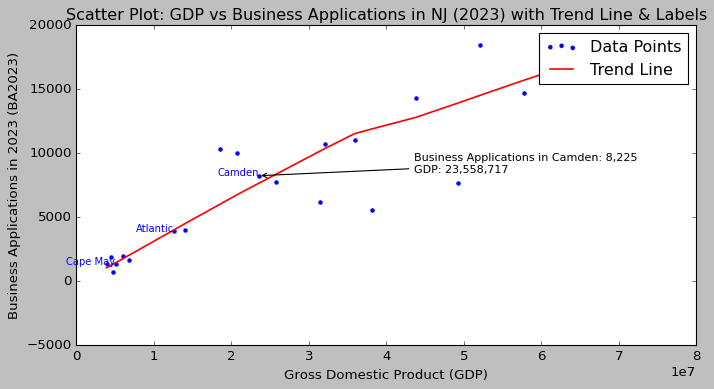

In [47]:
# To add specific county labels
# Set figure size
plt.figure(figsize=(10, 5))

# Scatter plot: GDP vs Business Applications (BA2023)
sns.scatterplot(data=mergedOuter, x="Gross Domestic Product", y="BA2023", label="Data Points")

# Add a trend line using regplot
sns.regplot(data=mergedOuter, x="Gross Domestic Product", y="BA2023", scatter=False, lowess=True, color='red', label="Trend Line")

# Add labels for specific counties
counties_to_label = ["Atlantic", "Camden", "Cape May"]
for i, row in mergedOuter.iterrows():
    if row["County"] in counties_to_label:
        plt.text(row["Gross Domestic Product"], row["BA2023"], row["County"], fontsize=9, ha='right', color='blue')

# Add labels and title
plt.xlabel("Gross Domestic Product (GDP)")
plt.ylabel("Business Applications in 2023 (BA2023)")
plt.title("Scatter Plot: GDP vs Business Applications in NJ (2023) with Trend Line & Labels")
# Before show the plot, I want to add some notes about Camden
plt.annotate("Business Applications in Camden: 8,225\nGDP: 23,558,717",
             xy=(23558717, 8225), xytext=(23558717 + 20000000, 8500),
             arrowprops=dict(arrowstyle="->", color="black"), fontsize=10, color="black")

# Show the plot
plt.legend()
plt.show()


Explanation> In this scatter plot you can see a strong, upward positive relationship between> Gross Domestic Product and Business Applications in 2023 in New Jersey. The trend line is also shown in red.

The higher the GDP, the higher the level of business creation in New Jersey.

New> We can see data of Camden. Also data of the two countys who have higher level of unemployment rate (Cape May and Atlantic City).

Explanation of Additions codes
* counties_to_label = ["Atlantic", "Camden", "Cape May"] → Defines which counties to label.
* Loop through mergedOuter.iterrows() → Checks if the row's county matches our list.
* plt.text(x, y, label, fontsize=9, ha='right', color='blue') → Places a text label at the correct GDP (x) and BA2023 (y) values.
* Uses color='blue' to make the labels stand out.

##Gross Domestic Product by County and BA

<BarContainer object of 21 artists>

Text(0.5, 1.0, 'Gross Domestic Product by County')

<BarContainer object of 21 artists>

Text(0.5, 1.0, 'Business Applications in 2023')

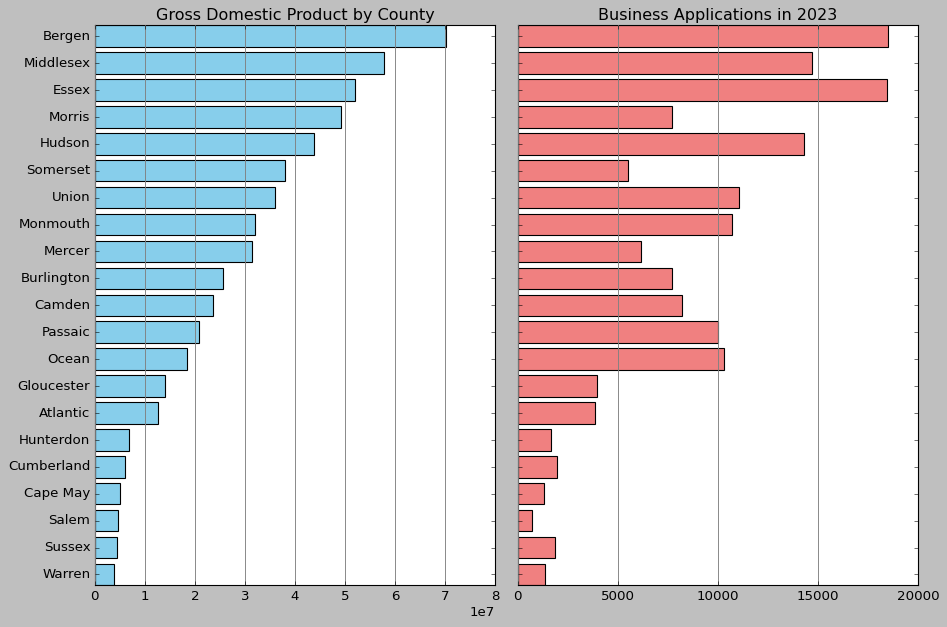

In [48]:
# Sort values based on GDP and BA2023
auto = mergedOuter.sort_values(['Gross Domestic Product', 'BA2023'], ascending=[True, True])

# Create horizontal bar charts for GDP and Business Applications
fig, axs = plt.subplots(1, 2, figsize=(12, 8), sharey=True, tight_layout=True, gridspec_kw={'width_ratios': [1,1]})

# First plot: GDP by County
axs[0].barh(auto["County"], auto["Gross Domestic Product"], color="skyblue")
axs[0].set_title('Gross Domestic Product by County')

# Second plot: Business Applications by County
axs[1].barh(auto["County"], auto["BA2023"], color="lightcoral")
axs[1].set_title('Business Applications in 2023')

# Add gridlines for better readability
axs[0].grid(axis='x', color='grey', linestyle='-', linewidth=0.9, alpha=0.9)
axs[1].grid(axis='x', color='grey', linestyle='-', linewidth=0.9, alpha=0.9)

# Show the plot
plt.show()


Explanation> Comparative bar chart between GDP and Business Application in 2023, where there is a ranking ordered by GDP level per county.
The counties with the highest GDP level are Bergen, Middlesex, Essex, and also have high levels of Business Application. The countys with lower GDP Level are Warren, Sussex and Salem and also they have lower number of Business Application in 2023.

Text(0.5, 1.0, 'Gross Domestic Product by County')

Text(4411548, 0.0, '3,911,548')

Text(4938507, 1.0, '4,438,507')

Text(5229720, 2.0, '4,729,720')

Text(5570716, 3.0, '5,070,716')

Text(6507622, 4.0, '6,007,622')

Text(7320939, 5.0, '6,820,939')

Text(13093490, 6.0, '12,593,490')

Text(14517096, 7.0, '14,017,096')

Text(19011055, 8.0, '18,511,055')

Text(21244966, 9.0, '20,744,966')

Text(24058717, 10.0, '23,558,717')

Text(26225252, 11.0, '25,725,252')

Text(31967636, 12.0, '31,467,636')

Text(32623913, 13.0, '32,123,913')

Text(36435725, 14.0, '35,935,725')

Text(38623619, 15.0, '38,123,619')

Text(44347173, 16.0, '43,847,173')

Text(49785606, 17.0, '49,285,606')

Text(52570494, 18.0, '52,070,494')

Text(58245463, 19.0, '57,745,463')

Text(70658193, 20.0, '70,158,193')

Text(0.5, 1.0, 'Business Applications in 2023')

Text(1859, 0.0, '1,359')

Text(2342, 1.0, '1,842')

Text(1235, 2.0, '735')

Text(1811, 3.0, '1,311')

Text(2482, 4.0, '1,982')

Text(2174, 5.0, '1,674')

Text(4385, 6.0, '3,885')

Text(4477, 7.0, '3,977')

Text(10817, 8.0, '10,317')

Text(10525, 9.0, '10,025')

Text(8725, 10.0, '8,225')

Text(8203, 11.0, '7,703')

Text(6640, 12.0, '6,140')

Text(11195, 13.0, '10,695')

Text(11545, 14.0, '11,045')

Text(6018, 15.0, '5,518')

Text(14821, 16.0, '14,321')

Text(8194, 17.0, '7,694')

Text(18976, 18.0, '18,476')

Text(15185, 19.0, '14,685')

Text(19008, 20.0, '18,508')

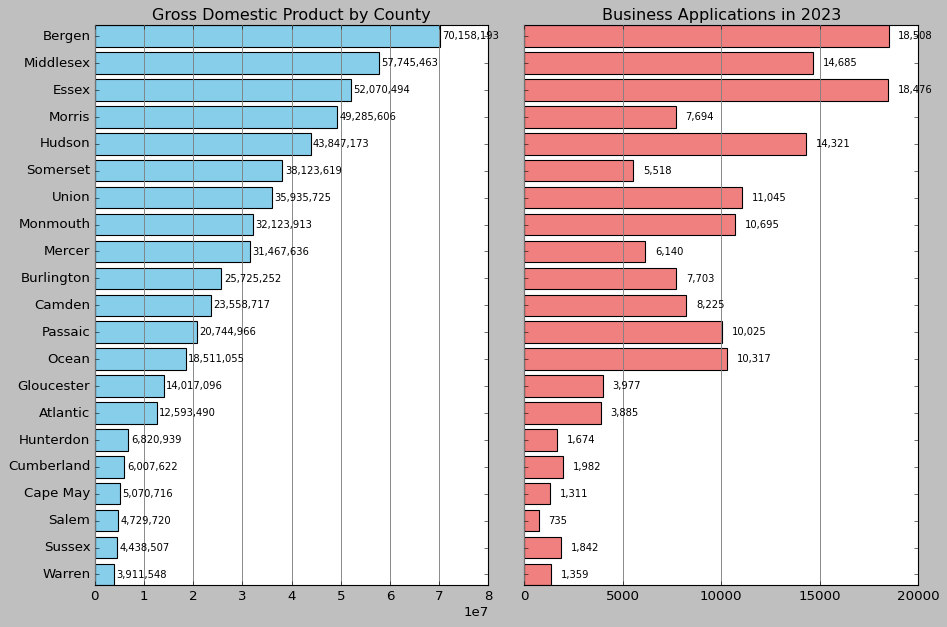

In [49]:
# Sort values based on GDP and BA2023
auto = mergedOuter.sort_values(['Gross Domestic Product', 'BA2023'], ascending=[True, True])

# Create horizontal bar charts for GDP and Business Applications
fig, axs = plt.subplots(1, 2, figsize=(12, 8), sharey=True, tight_layout=True, gridspec_kw={'width_ratios': [1,1]})

# First plot: GDP by County
bars1 = axs[0].barh(auto["County"], auto["Gross Domestic Product"], color="skyblue")
axs[0].set_title('Gross Domestic Product by County')

# Add data labels for GDP
for bar in bars1:
    axs[0].text(bar.get_width() + 500000, bar.get_y() + bar.get_height()/2, f"{int(bar.get_width()):,}",
                va='center', fontsize=9, color='black')

# Second plot: Business Applications by County
bars2 = axs[1].barh(auto["County"], auto["BA2023"], color="lightcoral")
axs[1].set_title('Business Applications in 2023')

# Add data labels for BA2023
for bar in bars2:
    axs[1].text(bar.get_width() + 500, bar.get_y() + bar.get_height()/2, f"{int(bar.get_width()):,}",
                va='center', fontsize=9, color='black')

# Add gridlines for better readability
axs[0].grid(axis='x', color='grey', linestyle='-', linewidth=0.9, alpha=0.9)
axs[1].grid(axis='x', color='grey', linestyle='-', linewidth=0.9, alpha=0.9)

# Show the plot
plt.show()


Same explanations with labels.

##Unemployment by County in % and BA

Text(0.5, 1.0, 'Unemployment by County in %')

Text(6.9, 0.0, '5')

Text(7.3, 1.0, '6')

Text(7.3, 2.0, '6')

Text(7.3, 3.0, '6')

Text(7.6, 4.0, '6')

Text(7.9, 5.0, '6')

Text(8.0, 6.0, '7')

Text(8.1, 7.0, '7')

Text(8.5, 8.0, '7')

Text(8.5, 9.0, '7')

Text(8.6, 10.0, '7')

Text(8.6, 11.0, '7')

Text(9.2, 12.0, '8')

Text(9.2, 13.0, '8')

Text(9.6, 14.0, '8')

Text(9.7, 15.0, '8')

Text(10.7, 16.0, '9')

Text(10.9, 17.0, '9')

Text(11.4, 18.0, '10')

Text(13.5, 19.0, '12')

Text(13.6, 20.0, '12')

Text(0.5, 1.0, 'Business Applications in 2023')

Text(2174, 0.0, '1,674')

Text(6018, 1.0, '5,518')

Text(6640, 2.0, '6,140')

Text(8194, 3.0, '7,694')

Text(8203, 4.0, '7,703')

Text(11195, 5.0, '10,695')

Text(15185, 6.0, '14,685')

Text(1859, 7.0, '1,359')

Text(4477, 8.0, '3,977')

Text(10817, 9.0, '10,317')

Text(2342, 10.0, '1,842')

Text(19008, 11.0, '18,508')

Text(8725, 12.0, '8,225')

Text(11545, 13.0, '11,045')

Text(1235, 14.0, '735')

Text(14821, 15.0, '14,321')

Text(2482, 16.0, '1,982')

Text(18976, 17.0, '18,476')

Text(10525, 18.0, '10,025')

Text(4385, 19.0, '3,885')

Text(1811, 20.0, '1,311')

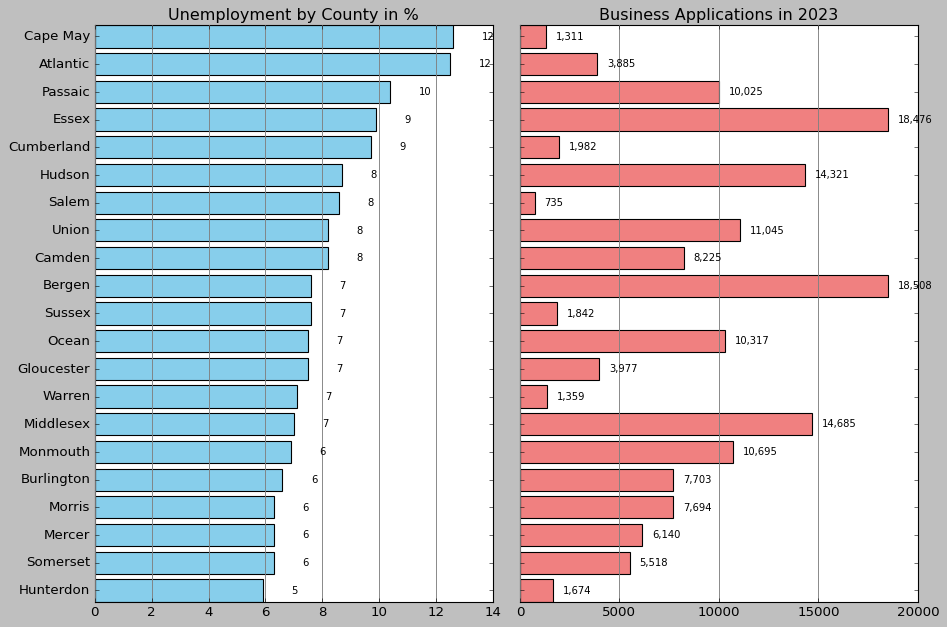

In [50]:
# Sort values based on Unemployment and BA2023
auto = mergedOuter.sort_values(['Unemployment', 'BA2023'], ascending=[True, True])

# Create horizontal bar charts for Unemployment and Business Applications
fig, axs = plt.subplots(1, 2, figsize=(12, 8), sharey=True, tight_layout=True, gridspec_kw={'width_ratios': [1,1]})

# First plot: Unemployment by County
bars1 = axs[0].barh(auto["County"], auto["Unemployment"], color="skyblue")
axs[0].set_title('Unemployment by County in %')

# Add data labels for Unemployment
for bar in bars1:
    axs[0].text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f"{int(bar.get_width()):,}",
                va='center', fontsize=9, color='black')

# Second plot: Business Applications by County
bars2 = axs[1].barh(auto["County"], auto["BA2023"], color="lightcoral")
axs[1].set_title('Business Applications in 2023')

# Add data labels for BA2023
for bar in bars2:
    axs[1].text(bar.get_width() + 500, bar.get_y() + bar.get_height()/2, f"{int(bar.get_width()):,}",
                va='center', fontsize=9, color='black')

# Add gridlines for better readability
axs[0].grid(axis='x', color='grey', linestyle='-', linewidth=0.9, alpha=0.9)
axs[1].grid(axis='x', color='grey', linestyle='-', linewidth=0.9, alpha=0.9)

# Show the plot
plt.show()


Explanation> Comparative bar chart between Unemployment by county in % and Business Application in 2023, where there is a ranking ordered by unemployment level per county.

There is high unemployment for Atlantic City and Cape May, both tourist spots, and they may have been affected by the covid season in 2020.

It is also not clear whether it is inversely related to the number of applications to businesses in New Jersey.

The counties with the highest unemployment level are not related to Business Application levels. A priori there is no relationship between variables.

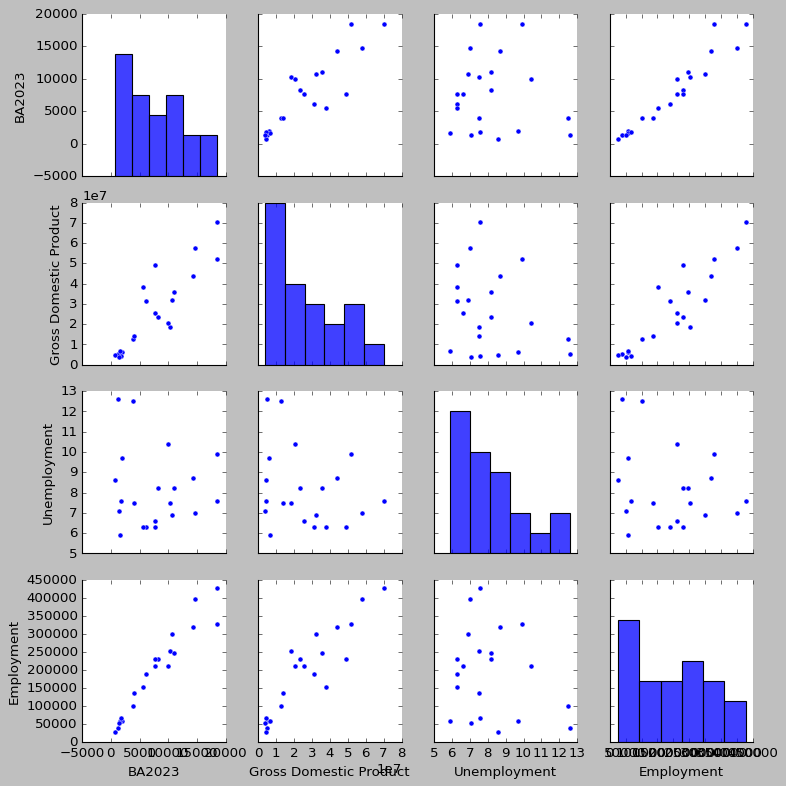

In [51]:
#Finally using the dataframe mergedOuter I want to create a corr matrix: very handy to get first quick idea about relationships in data, like corr matrix https://www.python-graph-gallery.com/correlogram/
sns.pairplot(mergedOuter[['BA2023','Gross Domestic Product','Unemployment','Employment']]) #,height=2,aspect=1

Explanations>

In the search to understand what factors affect the creation of new businesses in New Jersey and to look for the causes or correlations, in this correlation graph we can see something very interesting, that the level of applications for opening businesses in New Jersey (all counties) has a positive and ascending correlation with the variable Gross Domestic Product of each county in New Jersey. This may indicate that a dynamization of the economy causes the levels of business openings to grow.

In addition, it is observed that there is no tight correlation between New Businesses and unemployment in New Jersey.

However, there is a positive and ascending correlation between New Businesses in New Jersey and the level of employment, which tells us that new ventures create jobs.

Likewise, Gross Domestic Product has a positive and ascending correlation with employment levels, which is reinforced by the theory. Although this may also indicate that the employment variable may generate multicollinearity in the model if we try to do a multiple regression to integrate all the explanatory variables that could explain the variable> New businesses in New Jersey.

Now, check the next data frame merged to analyze

In [52]:
mergedOuter2.head()

,State,County,BA2005,BA2006,BA2007,BA2008,BA2009,BA2010,BA2011,BA2012,...,Wage 2015,Wage 2016,Wage 2017,Wage 2018,Wage 2019,Wage 2020,Wage 2021,Wage 2022,Wage 2023,_merge
0,New Jersey,Atlantic,2281,2314,2336,2227,2050,2159,2095,2117,...,39665.0,40362.0,41682.0,42850.0,43772.0,49306.0,51055.0,52852.0,54201.0,both
1,New Jersey,Bergen,11218,11633,11833,11537,11091,11437,11706,11650,...,63085.0,63323.0,63997.0,65378.0,66972.0,73426.0,75903.0,77278.0,79275.0,both
2,New Jersey,Burlington,3816,3904,4103,3927,3470,3515,3618,3510,...,53798.0,53456.0,54639.0,56829.0,58262.0,64983.0,66584.0,67974.0,68992.0,both
3,New Jersey,Camden,3953,4322,4398,4336,3812,3946,3893,3895,...,49078.0,49585.0,51162.0,52445.0,54335.0,59994.0,62506.0,63260.0,64846.0,both
4,New Jersey,Cape May,1080,1002,962,915,774,789,843,881,...,32361.0,33248.0,33359.0,34088.0,35378.0,39104.0,41103.0,42920.0,44209.0,both


In [53]:
# I need to check my data type, we cant use category data in scatterplot, just cross tab or frequency tab.
auto.dtypes

,0
County,object
Employment,int64
Unemployment,float64
Population,object
Gross Domestic Product,int64
Median Income,int64
State,object
BA2005,int64
BA2006,int64
BA2007,int64


##Scatter Plot: Business Applications vs Wages in NJ (2023)

<Figure size 640x400 with 0 Axes>

<Axes: xlabel='BA2023', ylabel='Wage 2023'>

Text(0.5, 0, 'Business Applications in 2023')

Text(0, 0.5, 'Average Wage in 2023')

Text(0.5, 1.0, 'Scatter Plot: Business Applications vs Wages in NJ (2023)')

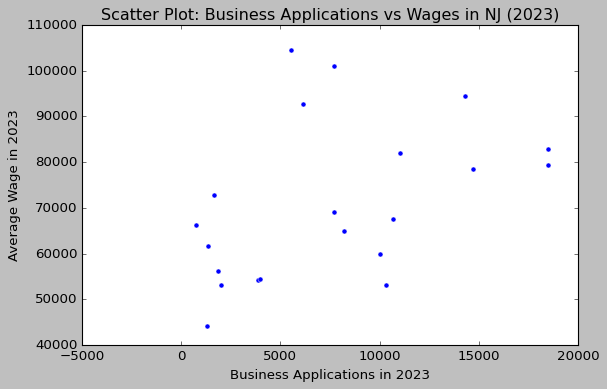

In [54]:
#import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Business Applications (BA2023) vs. Wages (2023)
plt.figure(figsize=(8, 5))
sns.scatterplot(x="BA2023", y="Wage 2023", data=mergedOuter2)

# Add labels and title
plt.xlabel("Business Applications in 2023")
plt.ylabel("Average Wage in 2023")
plt.title("Scatter Plot: Business Applications vs Wages in NJ (2023)")

# Show the plot
plt.show()

Explanation> Looks like there is a positive and direct relationship between the Business Application level and the average wage in 2023 in NJ.

<Figure size 640x400 with 0 Axes>

<Axes: xlabel='BA2023', ylabel='Wage 2023'>

Text(3885, 54201.0, 'Atlantic')

Text(18508, 79275.0, 'Bergen')

Text(7703, 68992.0, 'Burlington')

Text(8225, 64846.0, 'Camden')

Text(1311, 44209.0, 'Cape May')

Text(1982, 53218.0, 'Cumberland')

Text(18476, 82810.0, 'Essex')

Text(3977, 54471.0, 'Gloucester')

Text(14321, 94413.0, 'Hudson')

Text(1674, 72843.0, 'Hunterdon')

Text(6140, 92805.0, 'Mercer')

Text(14685, 78511.0, 'Middlesex')

Text(10695, 67516.0, 'Monmouth')

Text(7694, 101052.0, 'Morris')

Text(10317, 53210.0, 'Ocean')

Text(10025, 59806.0, 'Passaic')

Text(735, 66277.0, 'Salem')

Text(5518, 104451.0, 'Somerset')

Text(1842, 56130.0, 'Sussex')

Text(11045, 82077.0, 'Union')

Text(1359, 61732.0, 'Warren')

Text(0.5, 0, 'Business Applications in 2023')

Text(0, 0.5, 'Average Wage in 2023')

Text(0.5, 1.0, 'Scatter Plot: Business Applications vs Wages in NJ (2023)')

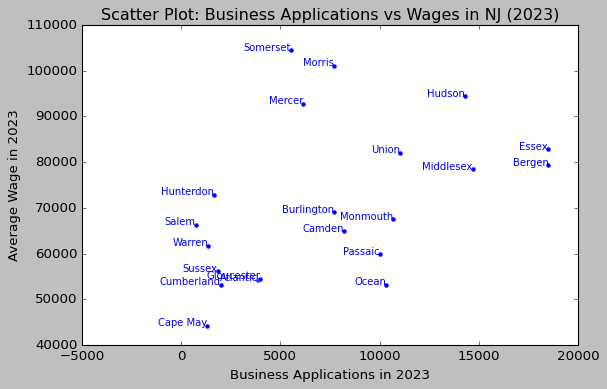

In [55]:
# Import necessary libraries
#import matplotlib.pyplot as plt
#import seaborn as sns

# Set figure size
plt.figure(figsize=(8, 5))

# Scatter plot: Business Applications (BA2023) vs. Wages (2023)
sns.scatterplot(x="BA2023", y="Wage 2023", data=mergedOuter2)

# Add county labels to each data point
for i, row in mergedOuter2.iterrows():
    plt.text(row["BA2023"], row["Wage 2023"], row["County"], fontsize=9, ha='right', color='blue')

# Add labels and title
plt.xlabel("Business Applications in 2023")
plt.ylabel("Average Wage in 2023")
plt.title("Scatter Plot: Business Applications vs Wages in NJ (2023)")

# Show the plot
plt.show()


Explanations> Here we can see Cape May have the low level of Business Application and lower Average Wage level, and Essex and Bergen have high level of BA. Somerset have high level of wage and the aroun 5k BA.

##Regression Model (just extra analysis) and the Regression Estimated Graphic

Finally, I want to explore the relationship between the variables in the hiphoteses, so I will run a regresion.

To perform a simple linear regression using Ordinary Least Squares (OLS) with Business Formation in New Jersey (BA2023) as the dependent variable and Gross Domestic Product (GDP) as the independent variable.

Output Interpretation
Intercept (β0): Expected BA2023 when GDP = 0.
Slope (β1): The change in BA2023 for each unit increase in GDP.
R-squared: How well GDP explains BA2023 (higher = better fit).
p-value: Checks if GDP is statistically significant in predicting BA2023.

 Explanation of the Code
* X = mergedOuter["Gross Domestic Product"] → Defines GDP as the independent variable.
* Y = mergedOuter["BA2023"] → Defines Business Applications (BA2023) as the dependent variable.
* sm.add_constant(X) → Adds an intercept (β0) to the model.
* sm.OLS(Y, X).fit() → Runs Ordinary Least Squares (OLS) regression.
* model.summary() → Displays the full regression output, including coefficients, R-squared, and p-values.

In [56]:
import statsmodels.api as sm

# Define dependent (Y) and independent (X) variables
X = mergedOuter["Gross Domestic Product"]  # Independent variable
Y = mergedOuter["BA2023"]  # Dependent variable

# Add constant to the independent variable (for the intercept)
X = sm.add_constant(X)

# Perform Ordinary Least Squares (OLS) regression
model = sm.OLS(Y, X).fit()

# Print regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 BA2023   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     67.36
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           1.14e-07
Time:                        22:18:43   Log-Likelihood:                -194.62
No. Observations:                  21   AIC:                             393.2
Df Residuals:                      19   BIC:                             395.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    999

<Figure size 640x400 with 0 Axes>

<Axes: xlabel='Gross Domestic Product', ylabel='BA2023'>

<Axes: xlabel='Gross Domestic Product', ylabel='BA2023'>

Text(0.5, 0, 'Gross Domestic Product (GDP)')

Text(0, 0.5, 'Business Applications in 2023 (BA2023)')

Text(0.5, 1.0, 'OLS Regression: GDP vs Business Applications in NJ (2023)')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

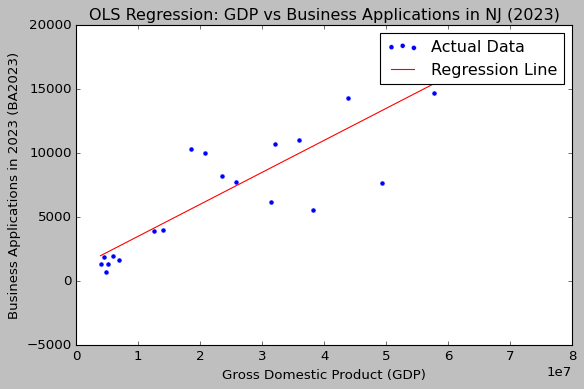

In [57]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Define dependent (Y) and independent (X) variables
X = mergedOuter["Gross Domestic Product"]  # Independent variable
Y = mergedOuter["BA2023"]  # Dependent variable

# Add constant to the independent variable (for the intercept)
X_const = sm.add_constant(X)

# Perform Ordinary Least Squares (OLS) regression
model = sm.OLS(Y, X_const).fit()

# Predicted values from the regression model
predictions = model.predict(X_const)

# Plot scatter plot of actual data
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X, y=Y, label="Actual Data")

# Plot regression line
sns.lineplot(x=X, y=predictions, color='red', label="Regression Line")

# Add labels and title
plt.xlabel("Gross Domestic Product (GDP)")
plt.ylabel("Business Applications in 2023 (BA2023)")
plt.title("OLS Regression: GDP vs Business Applications in NJ (2023)")

# Show the plot

plt.savefig('fig.jpg',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
files.download('fig.jpg') #note can also right click fig and save image as

plt.legend()
plt.show()


To download I can use this code>

plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff

files.download('fig.pdf') #note can also right click fig and save image as

To check the findings, we can graph bar charts, using codes from Matplot library.

[Text(0, 3, '1.25935e+07'),
 Text(0, 3, '1.25935e+07'),
 Text(0, 3, '1.25935e+07')]

[Text(0, 3, '229229'), Text(0, 3, '229229'), Text(0, 3, '229229')]

[Text(0, 3, '12.6'), Text(0, 3, '12.6'), Text(0, 3, '12.6')]

Text(0, 0.5, 'Length (mm)')

Text(0.5, 1.0, 'New Business in NJ and GDP and Employment level')

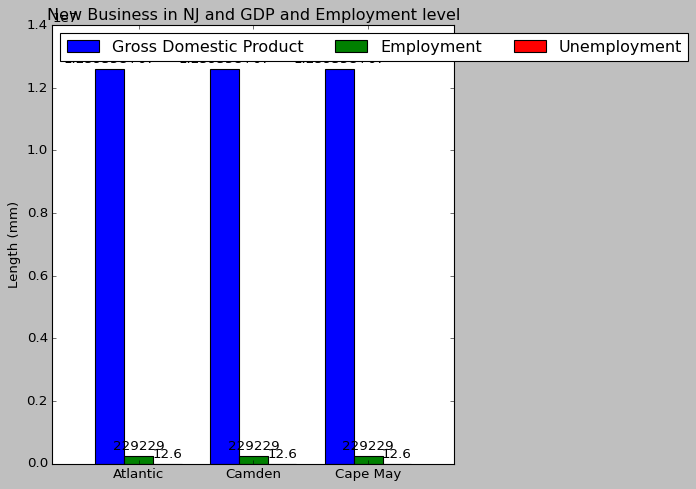

In [58]:
#From https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
#Grouped bar chart with labels
#This example shows a how to create a grouped bar chart and how to annotate bars with labels.

import matplotlib.pyplot as plt
import numpy as np

County = ['Atlantic', 'Camden', 'Cape May']
mergedOuterfinal = ['Gross Domestic Product', 'Employment', 'Unemployment']

x = np.arange(len(County))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in zip(mergedOuterfinal, County): # Switched the order in zip
    offset = width * multiplier
    # Access data from mergedOuter based on attribute and county
    rects = ax.bar(x + offset, mergedOuter[mergedOuter['County'] == measurement][attribute].values, width, label=attribute) # Fix: Access data correctly
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('New Business in NJ and GDP and Employment level')
ax.set_xticks(x + width, County) # Set x-axis tick labels to counties
ax.legend(loc='upper left', ncols=3)
#ax.set_ylim(0, 250) #Adjust ylim for better visibility

plt.show()

Some comments> it would be helpfull if I can calculate GDP Per capita or reduce divided by million so the level of measurement would be similar to the employment. Also take in consideration, Unemployment rate is percentage, so maybe I would need to add a secondary axis. Also the labels code needs to be revised and fixed below.

[Text(0, 3, '1.25935e+07'),
 Text(0, 3, '2.35587e+07'),
 Text(0, 3, '5.07072e+06')]

[Text(0, 3, '100709'), Text(0, 3, '229229'), Text(0, 3, '39046')]

[Text(0, 3, '12.5'), Text(0, 3, '8.2'), Text(0, 3, '12.6')]

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'New Business in NJ: GDP, Employment, and Unemployment')

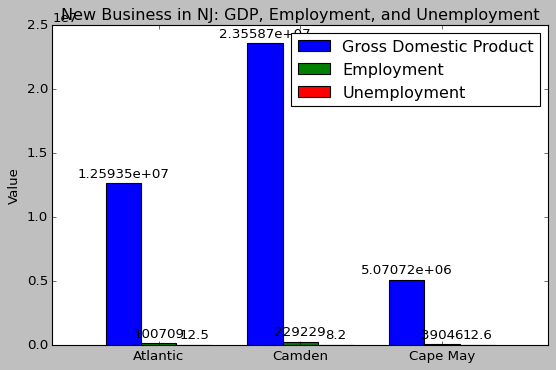

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Define counties and attributes
counties = ['Atlantic', 'Camden', 'Cape May']
attributes = ['Gross Domestic Product', 'Employment', 'Unemployment']

# Create label positions
x = np.arange(len(counties))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 5))

# Plot each attribute separately
for i, attribute in enumerate(attributes):
    values = [mergedOuter[mergedOuter['County'] == county][attribute].values[0] for county in counties]  # Extract values correctly
    offset = width * i  # Adjust bar positions
    rects = ax.bar(x + offset, values, width, label=attribute)  # Plot bars
    ax.bar_label(rects, padding=3)  # Add labels

# Labels, title, and ticks
ax.set_ylabel('Value')
ax.set_title('New Business in NJ: GDP, Employment, and Unemployment')
ax.set_xticks(x + width, counties)  # Set x-axis tick labels
ax.legend(loc='upper right', ncols=1)

plt.show()


Conclusion

* The analysis supports the hypothesis that counties in New Jersey with higher GDP levels tend to have a greater number of business applications.
* The OLS regression analysis between Gross Domestic Product GDP and Business Applications BA2023 in New Jersey shows a strong positive relationship R squared equals 0.780, indicating that approximately 78 percent of the variation in business applications can be explained by changes in GDP.
* The coefficient 0.0002 suggests that for every one dollar increase in GDP, business applications increase by 0.0002 on average, which is statistically significant with p value less than 0.001.
* The positive slope of the regression line confirms that counties with higher GDP tend to have more business applications.
* The statistically significant coefficient further confirms that economic growth plays a key role in fostering entrepreneurship.
* Counties with higher GDP likely provide better access to capital, a larger consumer base, and more economic opportunities, which encourage new business formation.
* Finally, the large condition number 5.57e plus 07 suggests potential multicollinearity or numerical issues, so further investigation may be needed to confirm the robustness of these results.
* Recomendation> Future research could incorporate additional factors such as population growth poer capita, unemployment rates as an explanatory variable, and policy incentives to refine the understanding of business formation dynamics in New Jersey (Dummy Variable).

> Percapita> Var Ind. in terms of Percapita to compare between countys
> North> locations quotes, AC, is a Turism, etc, location characteristics.

References
* https://github.com/theaok/vis/blob/main/all.ipynb for chart graphs and scatterplot codes
* ChatGpt for regressions and scatterplot labels, fraq.
* Youtube tutorials

# VIS PS3

##Research Topic, Research Question, Hypothesis and Variables

**Research Topic:**  
The Relationship Between County GDP, Industry Structure, and Business Formation in New Jersey  

**Research Question:**  
Do counties in New Jersey with higher GDP levels and stronger private industry presence show greater levels of business formation?  

**Hypothesis:**  
Counties with higher GDP and stronger concentrations of private-sector employment—measured by Location Quotients (LQ)—will have a higher number of business applications. Additionally, areas with stronger performance in key sectors like education and health services may also support more entrepreneurship, while counties with lower private-sector presence may benefit from targeted support.  

**Key Variables:**  
- **Business Applications (BA2023):** Dependent variable – represents entrepreneurship activity  
- **Gross Domestic Product (GDP):** Independent variable – shows overall economic strength  
- **GDP per Capita:** Economic capacity per person  
- **Unemployment Rate:** Indicator of economic stress  
- **Median Income:** Control for income levels  
- **Location Quotient – Total Private Industry (LQ):** Measures private-sector concentration vs. national average  
- **Location Quotient – Education & Health Services:** Shows specialization in a key industry with potential for business growth  

This study uses multiple datasets to explore how economic conditions, sector strength, and income levels influence business formation, helping identify counties that could benefit most from entrepreneurship support programs.

## Literature review
Why having employment and unemployment?

I included both employment and unemployment to capture both the size of the active workforce and the proportion of it that is not engaged in economic activity, which could affect business formation.
Following, we can see evidence of this argument.

### What influences business formation?
(business formation GDP)

### Relationship between GDP and entrepreneurship?
(entrepreneurship regional economic growth)
This pattern is consistent with prior studies linking regional GDP to entrepreneurial activity (e.g., Acs et al., 2008; Glaeser et al., 2010).

Sources>
https://www.researchgate.net/publication/5158481_Entrepreneurship_Economic_Development_and_Institutions

https://www.journals.uchicago.edu/doi/full/10.1086/674023?utm_source=chatgpt.com


### Also factor in business deaths
This analysis focuses on business applications but does not include business closures, which would give a more complete picture of net entrepreneurship.

The relationship between Gross Domestic Product (GDP) and unemployment is a widely studied topic in economics. "Okun’s Law" states that insufficient economic growth is generally associated with rising unemployment. This implies that regions with lower GDP may experience higher levels of unemployment, which can lead individuals to seek alternatives such as starting their own businesses. (Source: Federal Reserve Bank of St. Louis)
https://www.stlouisfed.org/on-the-economy/2012/may/the-relationships-among-changes-in-gdp-employment-and-unemployment-this-time-its-different?utm_source=chatgpt.com


In the context of New Jersey, it is essential to promote job creation and support entrepreneurship initiatives, especially in areas with high unemployment rates. To achieve this, workforce development programs focused on entrepreneurial skills can be implemented. For example, the "New Jersey Small Business Development Center (NJSBDC)" offers counseling and workshops for entrepreneurs and small businesses across the state.
https://njsbdc.com/annual-reports/


Additionally, the SkillUp NJ program provides free access to over 5,000 online courses in high-demand sectors such as information technology, business analysis, and project management. (Sources: NJSBDC, NJ.gov)
https://www.nj.gov/labor/career-services/education-training/skillup-nj/?utm_source=chatgpt.com

Finally, The APEX Accelerator program helps small businesses that want to work with the government. It offers free support like training, counseling, and help with bids to win local, state, or federal contracts. In New Jersey, APEX helps new and growing businesses understand how to sell their products or services to the government and become more competitive.
https://www.njit.edu/apex/
Partnership with Rutgers University>
https://njcern.rutgers.edu/resources/njit-procurement-technical-assistance-center-ptac/?utm_source=chatgpt.com



By investing in these training programs, New Jersey residents can be equipped with the necessary tools to launch and manage successful businesses, contributing to lower unemployment and strengthening the local economy.



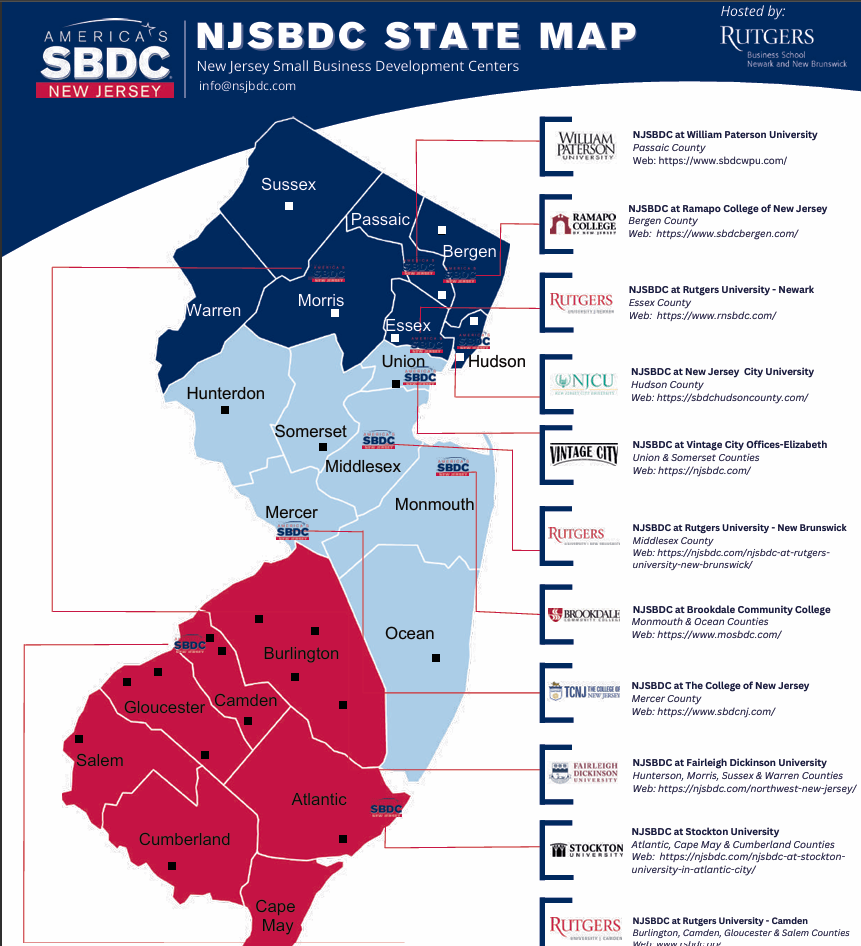

##Socioeconomical Data> County, Employment, Unemployment, Population, Gross Domestic Product, Median Income

In [60]:
df1[:21].style.background_gradient(cmap='Blues').format(precision=2)

,County,Employment,Unemployment,Population,Gross Domestic Product,Median Income
0,Atlantic,100709,12.50,"266,105",12593490,62678
1,Bergen,426341,7.60,"930,390",70158193,107971
2,Burlington,210681,6.60,"445,702",25725252,88443
3,Camden,229229,8.20,"506,738",23558717,73168
4,Cape May,39046,12.60,"93,086",5070716,66565
5,Cumberland,58005,9.70,"151,906",6007622,54179
6,Essex,326411,9.90,"795,404",52070494,64522
7,Gloucester,136373,7.50,"291,165",14017096,87996
8,Hudson,317844,8.70,"670,046",43847173,77738
9,Hunterdon,57934,5.90,"124,823",6820939,117275


Explanations> a table to explore the data in a better visual way. with mostly all the variables of the research in columns. Dark green for higher level of data values.

This table presents key socioeconomic indicators for each county in New Jersey, including Employment, Unemployment (as a percentage), Population, Gross Domestic Product (GDP in thousands), and Median Income. It allows for comparison across counties and highlights significant economic variability.

Counties like:
- Bergen Middlesex, and Morris show high employment, low unemployment, and high median incomes.

While counties like:
- Atlantic City, Cape May, Cumberland, have higher unemployment and lower median incomes.

Conclusion> The table reveals that more urbanized counties (high population, more GDP, more Employment) tend to have stronger economic indicators, while more rural or tourism-dependent counties face economic challenges. This variation provides a foundation for analyzing "how local economic conditions may influence business formation".

##GDP and BA

Text(0.5, 1.0, 'Gross Domestic Product by County')

Text(4411548, 0.0, '3,911,548')

Text(4938507, 1.0, '4,438,507')

Text(5229720, 2.0, '4,729,720')

Text(5570716, 3.0, '5,070,716')

Text(6507622, 4.0, '6,007,622')

Text(7320939, 5.0, '6,820,939')

Text(13093490, 6.0, '12,593,490')

Text(14517096, 7.0, '14,017,096')

Text(19011055, 8.0, '18,511,055')

Text(21244966, 9.0, '20,744,966')

Text(24058717, 10.0, '23,558,717')

Text(26225252, 11.0, '25,725,252')

Text(31967636, 12.0, '31,467,636')

Text(32623913, 13.0, '32,123,913')

Text(36435725, 14.0, '35,935,725')

Text(38623619, 15.0, '38,123,619')

Text(44347173, 16.0, '43,847,173')

Text(49785606, 17.0, '49,285,606')

Text(52570494, 18.0, '52,070,494')

Text(58245463, 19.0, '57,745,463')

Text(70658193, 20.0, '70,158,193')

Text(0.5, 1.0, 'Business Applications in 2023')

Text(1859, 0.0, '1,359')

Text(2342, 1.0, '1,842')

Text(1235, 2.0, '735')

Text(1811, 3.0, '1,311')

Text(2482, 4.0, '1,982')

Text(2174, 5.0, '1,674')

Text(4385, 6.0, '3,885')

Text(4477, 7.0, '3,977')

Text(10817, 8.0, '10,317')

Text(10525, 9.0, '10,025')

Text(8725, 10.0, '8,225')

Text(8203, 11.0, '7,703')

Text(6640, 12.0, '6,140')

Text(11195, 13.0, '10,695')

Text(11545, 14.0, '11,045')

Text(6018, 15.0, '5,518')

Text(14821, 16.0, '14,321')

Text(8194, 17.0, '7,694')

Text(18976, 18.0, '18,476')

Text(15185, 19.0, '14,685')

Text(19008, 20.0, '18,508')

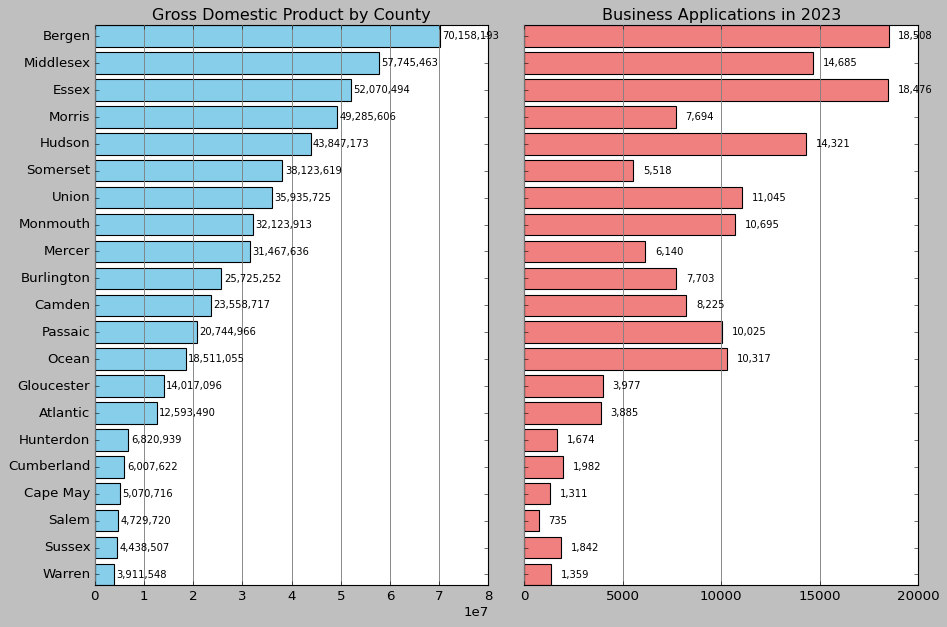

In [61]:
# Sort values based on GDP and BA2023
auto = mergedOuter.sort_values(['Gross Domestic Product', 'BA2023'], ascending=[True, True])

# Create horizontal bar charts for GDP and Business Applications
fig, axs = plt.subplots(1, 2, figsize=(12, 8), sharey=True, tight_layout=True, gridspec_kw={'width_ratios': [1,1]})

# First plot: GDP by County
bars1 = axs[0].barh(auto["County"], auto["Gross Domestic Product"], color="skyblue")
axs[0].set_title('Gross Domestic Product by County')

# Add data labels for GDP
for bar in bars1:
    axs[0].text(bar.get_width() + 500000, bar.get_y() + bar.get_height()/2, f"{int(bar.get_width()):,}",
                va='center', fontsize=9, color='black')

# Second plot: Business Applications by County
bars2 = axs[1].barh(auto["County"], auto["BA2023"], color="lightcoral")
axs[1].set_title('Business Applications in 2023')

# Add data labels for BA2023
for bar in bars2:
    axs[1].text(bar.get_width() + 500, bar.get_y() + bar.get_height()/2, f"{int(bar.get_width()):,}",
                va='center', fontsize=9, color='black')

# Add gridlines for better readability
axs[0].grid(axis='x', color='grey', linestyle='-', linewidth=0.9, alpha=0.9)
axs[1].grid(axis='x', color='grey', linestyle='-', linewidth=0.9, alpha=0.9)

# Show the plot
plt.show()

Explanation>
- Bar chart compares GDP and Business Applications in 2023, ranked by GDP per county  
- Counties with highest GDP: Bergen, Middlesex, Essex — also show high business application levels  
- Counties with lowest GDP: Warren, Sussex, Salem — also have low business application levels  
- Suggests a positive relationship between GDP and business formation across counties

##Correlation between variables

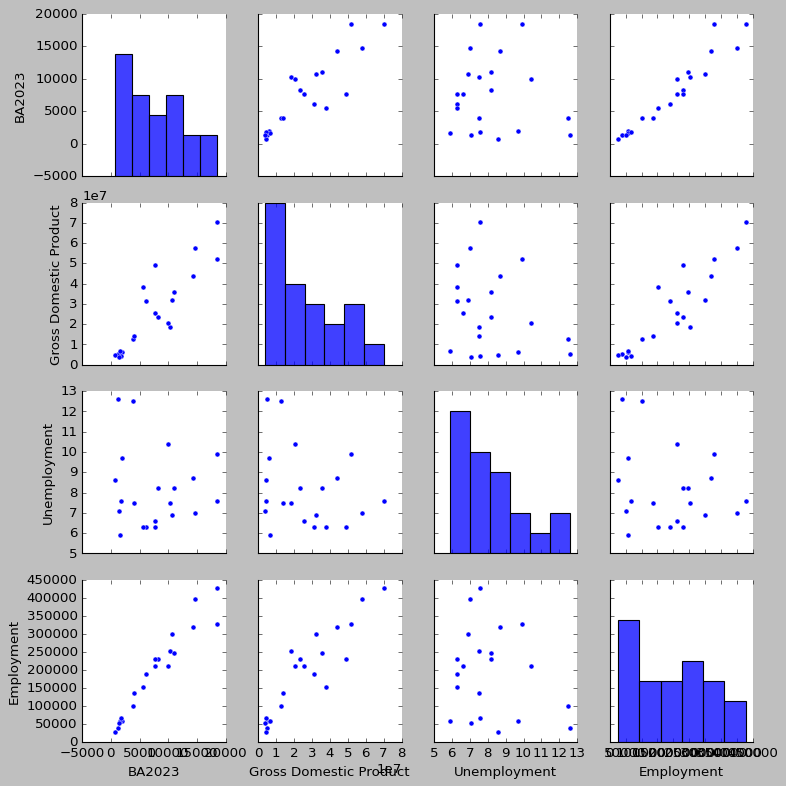

In [62]:
#Finally using the dataframe mergedOuter I want to create a corr matrix: very handy to get first quick idea about relationships in data, like corr matrix https://www.python-graph-gallery.com/correlogram/
sns.pairplot(mergedOuter[['BA2023','Gross Domestic Product','Unemployment','Employment']]) #,height=2,aspect=1

Explanation>
- Business applications increase with higher county GDP  
- There’s no clear link between GDP and unemployment, but Okun’s Law suggests that stronger economies usually have lower unemployment  
- More new businesses are linked to more jobs, showing a positive correlation with employment  
- GDP and employment move together, but using both in a model may cause multicollinearity

##Ranking on GDP and business applications
Gross Domestic Product by County and BA

Text(0.5, 1.0, 'Gross Domestic Product by County')

Text(4411548, 0.0, '3,911,548')

Text(4938507, 1.0, '4,438,507')

Text(5229720, 2.0, '4,729,720')

Text(5570716, 3.0, '5,070,716')

Text(6507622, 4.0, '6,007,622')

Text(7320939, 5.0, '6,820,939')

Text(13093490, 6.0, '12,593,490')

Text(14517096, 7.0, '14,017,096')

Text(19011055, 8.0, '18,511,055')

Text(21244966, 9.0, '20,744,966')

Text(24058717, 10.0, '23,558,717')

Text(26225252, 11.0, '25,725,252')

Text(31967636, 12.0, '31,467,636')

Text(32623913, 13.0, '32,123,913')

Text(36435725, 14.0, '35,935,725')

Text(38623619, 15.0, '38,123,619')

Text(44347173, 16.0, '43,847,173')

Text(49785606, 17.0, '49,285,606')

Text(52570494, 18.0, '52,070,494')

Text(58245463, 19.0, '57,745,463')

Text(70658193, 20.0, '70,158,193')

Text(0.5, 1.0, 'Business Applications in 2023')

Text(1859, 0.0, '1,359')

Text(2342, 1.0, '1,842')

Text(1235, 2.0, '735')

Text(1811, 3.0, '1,311')

Text(2482, 4.0, '1,982')

Text(2174, 5.0, '1,674')

Text(4385, 6.0, '3,885')

Text(4477, 7.0, '3,977')

Text(10817, 8.0, '10,317')

Text(10525, 9.0, '10,025')

Text(8725, 10.0, '8,225')

Text(8203, 11.0, '7,703')

Text(6640, 12.0, '6,140')

Text(11195, 13.0, '10,695')

Text(11545, 14.0, '11,045')

Text(6018, 15.0, '5,518')

Text(14821, 16.0, '14,321')

Text(8194, 17.0, '7,694')

Text(18976, 18.0, '18,476')

Text(15185, 19.0, '14,685')

Text(19008, 20.0, '18,508')

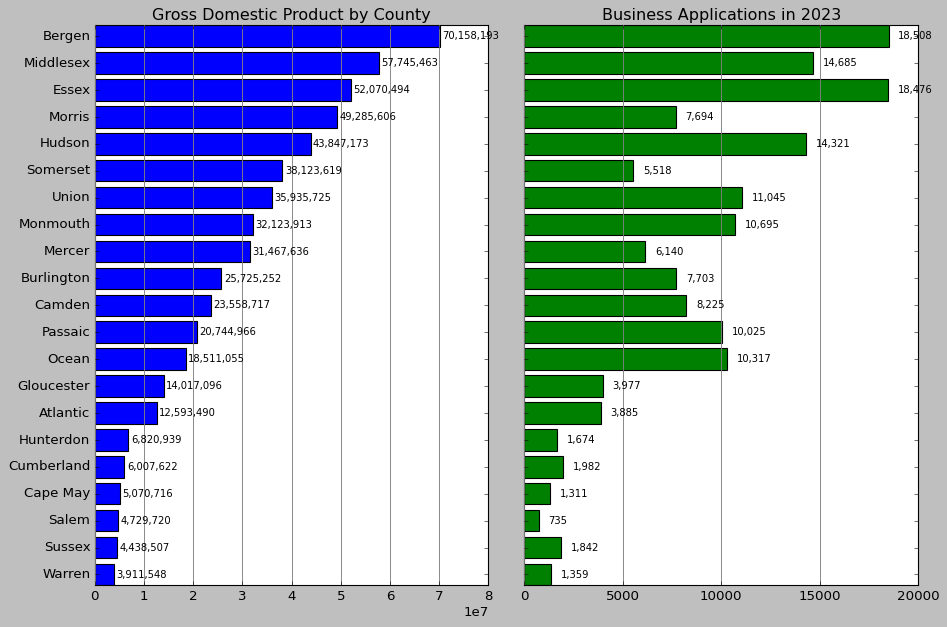

In [63]:
# Sort values based on GDP and BA2023
auto = mergedOuter.sort_values(['Gross Domestic Product', 'BA2023'], ascending=[True, True])

# Create horizontal bar charts for GDP and Business Applications
fig, axs = plt.subplots(1, 2, figsize=(12, 8), sharey=True, tight_layout=True, gridspec_kw={'width_ratios': [1,1]})

# First plot: GDP by County
bars1 = axs[0].barh(auto["County"], auto["Gross Domestic Product"], color="blue")
axs[0].set_title('Gross Domestic Product by County')

# Add data labels for GDP
for bar in bars1:
    axs[0].text(bar.get_width() + 500000, bar.get_y() + bar.get_height()/2, f"{int(bar.get_width()):,}",
                va='center', fontsize=9, color='black')

# Second plot: Business Applications by County
bars2 = axs[1].barh(auto["County"], auto["BA2023"], color="green")
axs[1].set_title('Business Applications in 2023')

# Add data labels for BA2023
for bar in bars2:
    axs[1].text(bar.get_width() + 500, bar.get_y() + bar.get_height()/2, f"{int(bar.get_width()):,}",
                va='center', fontsize=9, color='black')

# Add gridlines for better readability
axs[0].grid(axis='x', color='grey', linestyle='-', linewidth=0.9, alpha=0.9)
axs[1].grid(axis='x', color='grey', linestyle='-', linewidth=0.9, alpha=0.9)

# Show the plot
plt.show()


Explanation> Comparative bar chart between GDP and Business Application in 2023, where there is a ranking ordered by GDP level per county. The counties with the highest GDP level are Bergen, Middlesex, Essex, and also have high levels of Business Application. The countys with lower GDP Level are Warren, Sussex and Salem and also they have lower number of Business Application in 2023.

##Ranking of Counties by GDP per Capita and Business Applications

Since business application counts are reported in absolute terms by county, it is important to adjust the scale of GDP to allow for fair comparisons across regions. Some counties may have high GDP levels simply due to larger populations. To address this, a new variable was created to represent Gross Domestic Product per capita, calculated by dividing total GDP by the population of each county. This variable helps to capture the average economic output per resident and allows for a more meaningful analysis of its relationship with business formation.

In [64]:
# Convert 'Population' column to numeric, handling errors (e.g., commas)
# Apply a custom function to clean and convert each element
def clean_population(value):
    try:
        # Attempt to convert directly to numeric, removing commas if present
        return pd.to_numeric(str(value).replace(',', ''))
    except ValueError:
        # If conversion fails, return NaN
        return pd.NA

mergedOuter["Population"] = mergedOuter["Population"].apply(clean_population)

In [65]:
mergedOuter.dtypes

,0
County,object
Employment,int64
Unemployment,float64
Population,int64
Gross Domestic Product,int64
Median Income,int64
State,object
BA2005,int64
BA2006,int64
BA2007,int64


In [66]:
# Create new variable: GDP per capita
mergedOuter["GDP per capita"] = mergedOuter["Gross Domestic Product"] / mergedOuter["Population"]



In [67]:
# for the entery table> mergedOuter[:21].style.background_gradient(cmap='Blues').format(precision=1)
mergedOuter[[
    "County",
    "Employment",
    "Unemployment",
    "Population",
    "Gross Domestic Product",
    "GDP per capita",
    "Median Income",
    "BA2023"
]][:21].style.background_gradient(cmap='Blues').format(precision=1)


,County,Employment,Unemployment,Population,Gross Domestic Product,GDP per capita,Median Income,BA2023
0,Atlantic,100709,12.5,266105,12593490,47.3,62678,3885
1,Bergen,426341,7.6,930390,70158193,75.4,107971,18508
2,Burlington,210681,6.6,445702,25725252,57.7,88443,7703
3,Camden,229229,8.2,506738,23558717,46.5,73168,8225
4,Cape May,39046,12.6,93086,5070716,54.5,66565,1311
5,Cumberland,58005,9.7,151906,6007622,39.5,54179,1982
6,Essex,326411,9.9,795404,52070494,65.5,64522,18476
7,Gloucester,136373,7.5,291165,14017096,48.1,87996,3977
8,Hudson,317844,8.7,670046,43847173,65.4,77738,14321
9,Hunterdon,57934,5.9,124823,6820939,54.6,117275,1674


<Figure size 800x640 with 0 Axes>

Text(32.037205637014495, 0.0, '31')

Text(32.37130962730505, 1.0, '31')

Text(37.94950029283407, 2.0, '36')

Text(40.548286440298604, 3.0, '39')

Text(42.190313658448446, 4.0, '41')

Text(47.490922330671864, 5.0, '46')

Text(48.32526634223333, 6.0, '47')

Text(49.14141809626844, 7.0, '48')

Text(52.67449196424406, 8.0, '51')

Text(55.473454654835315, 9.0, '54')

Text(55.644889163054884, 10.0, '54')

Text(58.71850249718422, 11.0, '57')

Text(65.86206597801936, 12.0, '64')

Text(66.43904896081762, 13.0, '65')

Text(66.46420938290478, 14.0, '65')

Text(70.91653307826424, 15.0, '69')

Text(76.08683918082235, 16.0, '75')

Text(76.40729479035673, 17.0, '75')

Text(86.52800865400819, 18.0, '85')

Text(100.89400846002769, 19.0, '99')

Text(116.58285885798483, 20.0, '115')

Text(0.5, 0, 'GDP per Capita (in thousands of USD)')

Text(0.5, 1.0, 'Gross Domestic Product per Capita(in thousands of USD) by County in NJ')

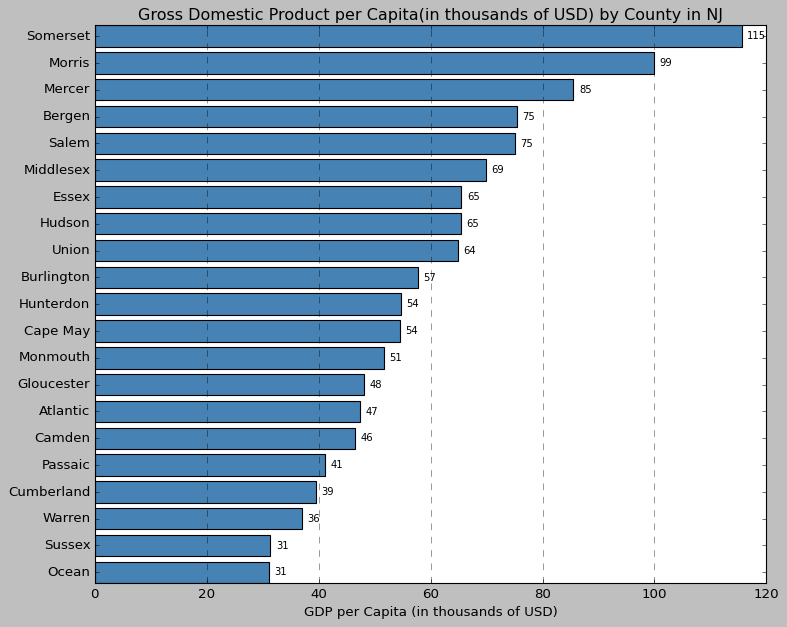

In [68]:
import matplotlib.pyplot as plt

# Sort by GDP per capita
auto = mergedOuter.sort_values("GDP per capita", ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
bars = plt.barh(auto["County"], auto["GDP per capita"], color="steelblue")

# Add data labels to each bar
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f"{int(bar.get_width()):,}", va='center', fontsize=9, color='black')

# Add labels and title
plt.xlabel("GDP per Capita (in thousands of USD)")
plt.title("Gross Domestic Product per Capita(in thousands of USD) by County in NJ")

# Remove vertical axis line
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Gross Domestic Product per capita by County (in thousands of USD)')

Text(32.037205637014495, 0.0, '31')

Text(32.37130962730505, 1.0, '31')

Text(37.94950029283407, 2.0, '36')

Text(40.548286440298604, 3.0, '39')

Text(42.190313658448446, 4.0, '41')

Text(47.490922330671864, 5.0, '46')

Text(48.32526634223333, 6.0, '47')

Text(49.14141809626844, 7.0, '48')

Text(52.67449196424406, 8.0, '51')

Text(55.473454654835315, 9.0, '54')

Text(55.644889163054884, 10.0, '54')

Text(58.71850249718422, 11.0, '57')

Text(65.86206597801936, 12.0, '64')

Text(66.43904896081762, 13.0, '65')

Text(66.46420938290478, 14.0, '65')

Text(70.91653307826424, 15.0, '69')

Text(76.08683918082235, 16.0, '75')

Text(76.40729479035673, 17.0, '75')

Text(86.52800865400819, 18.0, '85')

Text(100.89400846002769, 19.0, '99')

Text(116.58285885798483, 20.0, '115')

Text(0.5, 1.0, 'Business Applications in 2023')

Text(10817, 0.0, '10,317')

Text(2342, 1.0, '1,842')

Text(1859, 2.0, '1,359')

Text(2482, 3.0, '1,982')

Text(10525, 4.0, '10,025')

Text(8725, 5.0, '8,225')

Text(4385, 6.0, '3,885')

Text(4477, 7.0, '3,977')

Text(11195, 8.0, '10,695')

Text(1811, 9.0, '1,311')

Text(2174, 10.0, '1,674')

Text(8203, 11.0, '7,703')

Text(11545, 12.0, '11,045')

Text(14821, 13.0, '14,321')

Text(18976, 14.0, '18,476')

Text(15185, 15.0, '14,685')

Text(1235, 16.0, '735')

Text(19008, 17.0, '18,508')

Text(6640, 18.0, '6,140')

Text(8194, 19.0, '7,694')

Text(6018, 20.0, '5,518')

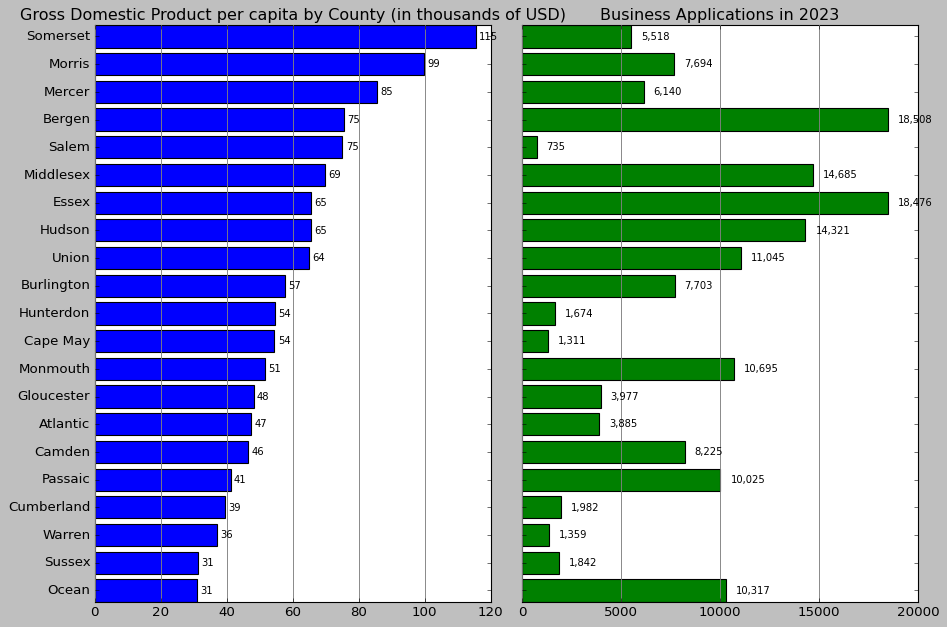

In [69]:
#NO# Sort values based on GDP per capita and BA2023
auto = mergedOuter.sort_values(['GDP per capita', 'BA2023'], ascending=[True, True])

# Create horizontal bar charts for GDP per capita and Business Applications
fig, axs = plt.subplots(1, 2, figsize=(12, 8), sharey=True, tight_layout=True, gridspec_kw={'width_ratios': [1,1]})

# First plot: GDP per capita by County
bars1 = axs[0].barh(auto["County"], auto["GDP per capita"], color="blue")
axs[0].set_title('Gross Domestic Product per capita by County (in thousands of USD)')

# Add data labels for GDP per capita
for bar in bars1:
    axs[0].text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f"{int(bar.get_width()):,}",
                va='center', fontsize=9, color='black')

# Second plot: Business Applications by County
bars2 = axs[1].barh(auto["County"], auto["BA2023"], color="green")
axs[1].set_title('Business Applications in 2023')

# Add data labels for BA2023
for bar in bars2:
    axs[1].text(bar.get_width() + 500, bar.get_y() + bar.get_height()/2, f"{int(bar.get_width()):,}",
                va='center', fontsize=9, color='black')

# Add gridlines for better readability
axs[0].grid(axis='x', color='grey', linestyle='-', linewidth=0.9, alpha=0.9)
axs[1].grid(axis='x', color='grey', linestyle='-', linewidth=0.9, alpha=0.9)

# Show the plot
plt.show()

This figure shows a side-by-side comparison of New Jersey counties ranked by Gross Domestic Product per capita and the number of business applications in 2023. Sorting the data this way highlights how counties with higher individual economic output may or may not correspond to higher levels of business formation. The visualization helps identify patterns, outliers, or mismatches—such as counties with high productivity but low entrepreneurial activity, or vice versa—which may point to local economic conditions or policy influences.

In [70]:
# for the entery table> mergedOuter[:21].style.background_gradient(cmap='Blues').format(precision=1)
mergedOuter[[
    "County",
    "Gross Domestic Product",
    "GDP per capita",
    "BA2023"
]][:21].style.background_gradient(cmap='Blues').format(precision=1)


,County,Gross Domestic Product,GDP per capita,BA2023
0,Atlantic,12593490,47.3,3885
1,Bergen,70158193,75.4,18508
2,Burlington,25725252,57.7,7703
3,Camden,23558717,46.5,8225
4,Cape May,5070716,54.5,1311
5,Cumberland,6007622,39.5,1982
6,Essex,52070494,65.5,18476
7,Gloucester,14017096,48.1,3977
8,Hudson,43847173,65.4,14321
9,Hunterdon,6820939,54.6,1674


## Business Creation and Economic Pressure in New Jersey Counties

Variables to compare:

- BA2023 (Business Applications) → proxy for entrepreneurship
- Unemployment → proxy for economic distress
- GDP per capita and Median Income → proxy for economic opportunity

Explanation>
This chart compares three key indicators in New Jersey counties:

- BA2023 (Business Applications): Shows how many new businesses were started.
- Unemployment Rate: Tells us where people may be struggling to find work.
- GDP per Capita: Measures the average economic output per person and shows the level of opportunity in each county.

By looking at these together, we can better understand where people are more likely to start businesses and how economic conditions may influence entrepreneurship.

<Figure size 800x480 with 0 Axes>

Text(12.5, 3885, 'Atlantic')

Text(7.6, 18508, 'Bergen')

Text(6.6, 7703, 'Burlington')

Text(8.2, 8225, 'Camden')

Text(12.6, 1311, 'Cape May')

Text(9.7, 1982, 'Cumberland')

Text(9.9, 18476, 'Essex')

Text(7.5, 3977, 'Gloucester')

Text(8.7, 14321, 'Hudson')

Text(5.9, 1674, 'Hunterdon')

Text(6.3, 6140, 'Mercer')

Text(7.0, 14685, 'Middlesex')

Text(6.9, 10695, 'Monmouth')

Text(6.3, 7694, 'Morris')

Text(7.5, 10317, 'Ocean')

Text(10.4, 10025, 'Passaic')

Text(8.6, 735, 'Salem')

Text(6.3, 5518, 'Somerset')

Text(7.6, 1842, 'Sussex')

Text(8.2, 11045, 'Union')

Text(7.1, 1359, 'Warren')

Text(0.5, 0, 'Unemployment Rate (%)')

Text(0, 0.5, 'Business Applications (2023)')

Text(0.5, 1.0, 'Business Applications vs Unemployment in NJ (Bubble size: Income, Color: GDP per Capita)')

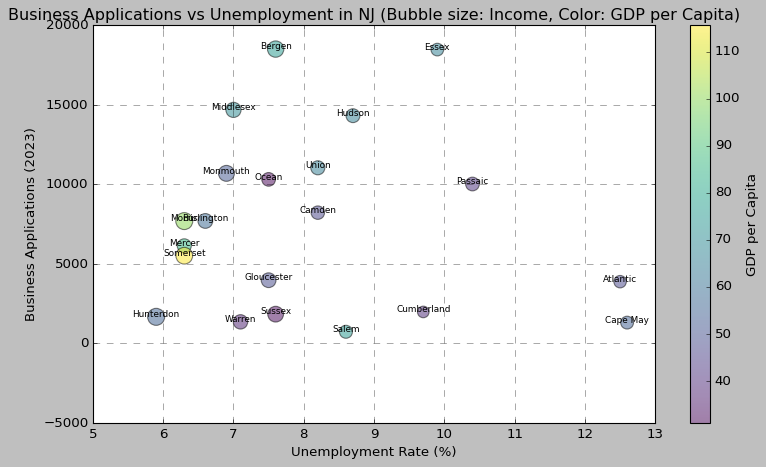

In [71]:
# Bubble chart with BA2023 vs Unemployment, bubble size = Median Income
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    mergedOuter["Unemployment"],
    mergedOuter["BA2023"],
    s=mergedOuter["Median Income"] / 500,  # size scaled down
    alpha=0.5,
    c=mergedOuter["GDP per capita"],
    cmap='viridis'
)

# Add county labels
for i, row in mergedOuter.iterrows():
    plt.text(row["Unemployment"], row["BA2023"], row["County"], fontsize=8, ha='center')

# Labels and title
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Business Applications (2023)")
plt.title("Business Applications vs Unemployment in NJ (Bubble size: Income, Color: GDP per Capita)")
plt.colorbar(label="GDP per Capita")

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Explanations> Cumberlan, Atlantic, Cape May does have many challenges; and North jersey counties (Bergen, Essex) are doing great on the other hand

Studies show that entrepreneurship often rises during periods of high unemployment, not just during economic booms (e.g., necessity entrepreneurship).

Source: Fairlie & Fossen (2021), “The Determinants of Business Entry and Exit during COVID-19”

High unemployment + low income → may indicate push factors driving people to start businesses.

Summary:
Bubble size = Median Income → This means larger bubbles represent counties with higher median household income.
Bubble color = GDP per capita → The color gradient (viridis) represents the economic productivity per person in each county.

- Size = Median Income
- Color = GDP per capita
- X-axis = Unemployment Rate
- Y-axis = Business Applications (BA2023)

This combination allows me to compare economic pressure (unemployment) with entrepreneurial activity (BA2023) while visualizing economic opportunity through both income and productivity.

Explanation> The plot suggests that counties with higher unemployment may still experience significant business formation, which aligns with literature on necessity-driven entrepreneurship. Counties with both low income and high unemployment (e.g., Cumberland, Atlantic) show relatively active application rates, while high-income, low-unemployment counties (e.g., Morris, Somerset) also show strong business activity—pointing to mixed motivations across the state.

## Location Quotient variable review

Because the impact of the level of Gross Domestic Product per capita or level of income per County is not very significant, we seek to add a new variable as a proxy for these indicators, new variable Location quotient.

In the database we have the variables LQ> Employment Location Quotient Relative to U.S. and Total Wage Location Quotient Relative to U.S.
The explanation> If an LQ is equal to 1, then the industry has the same share of its area employment (or total wage) as it does in the nation. An LQ greater than 1 indicates an industry with a greater share of the local area employment (or wages) than is the case nationwide. For example, Bergen 1.05 Employment Location Quotient Relative to U.S.

https://docs.google.com/spreadsheets/d/e/2PACX-1vQT8hHjiM5ankNj3q3xblbotJdzpRqiZvY--AWgiGlZrSfki9T0M6kJdFZV6A5Q6A/pubhtml?gid=2115564207&single=true

https://docs.google.com/spreadsheets/d/e/2PACX-1vQT8hHjiM5ankNj3q3xblbotJdzpRqiZvY--AWgiGlZrSfki9T0M6kJdFZV6A5Q6A/pub?gid=2115564207&single=true&output=csv


In [72]:
df4 = pd.read_csv ('https://docs.google.com/spreadsheets/d/e/2PACX-1vQT8hHjiM5ankNj3q3xblbotJdzpRqiZvY--AWgiGlZrSfki9T0M6kJdFZV6A5Q6A/pub?gid=2115564207&single=true&output=csv')

<ipython-input-72-3ae9fd1617c3>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv ('https://docs.google.com/spreadsheets/d/e/2PACX-1vQT8hHjiM5ankNj3q3xblbotJdzpRqiZvY--AWgiGlZrSfki9T0M6kJdFZV6A5Q6A/pub?gid=2115564207&single=true&output=csv')


In [73]:
# Filter df4 for New Jersey, Private Ownership, and Total Industry, excluding undefined areas
df4_filtered = df4[
    (df4["Area Type"] == "County") &
    (df4["St Name"] == "New Jersey") &
    (df4["Ownership"] == "Private") &
    (df4["Industry"] == "10 Total, all industries") &
    (df4["Area"] != "Unknown Or Undefined, New Jersey")
]

# Display the filtered results
df4_filtered.head()


,Area\nCode,St,Cnty,Own,NAICS,Year,Qtr,Area Type,St Name,Area,Ownership,Industry,Annual Average Status Code,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
31851,34001,34,1.0,5,10,2023,A,County,New Jersey,"Atlantic County, New Jersey",Private,"10 Total, all industries",NaN,"6,911","105,030","5,692,663,077","1,042","54,200",0.98,0.92
31869,34003,34,3.0,5,10,2023,A,County,New Jersey,"Bergen County, New Jersey",Private,"10 Total, all industries",NaN,"35,098","392,497","31,115,189,292","1,525","79,275",1.05,1.05
31887,34005,34,5.0,5,10,2023,A,County,New Jersey,"Burlington County, New Jersey",Private,"10 Total, all industries",NaN,"11,926","183,809","12,681,241,373","1,327","68,992",1.03,1.02
31905,34007,34,7.0,5,10,2023,A,County,New Jersey,"Camden County, New Jersey",Private,"10 Total, all industries",NaN,"13,387","176,138","11,421,783,386","1,247","64,845",1.01,0.98
31923,34009,34,9.0,5,10,2023,A,County,New Jersey,"Cape May County, New Jersey",Private,"10 Total, all industries",NaN,"3,877","34,725","1,535,183,337",850,"44,209",0.96,0.89


In [74]:
# Rename the column
df4_filtered = df4_filtered.rename(columns={"Area": "County"})

# Replace full county names with simplified ones
df4_filtered["County"] = df4_filtered["County"].replace({
    "Atlantic County, New Jersey": "Atlantic",
    "Bergen County, New Jersey": "Bergen",
    "Burlington County, New Jersey": "Burlington",
    "Camden County, New Jersey": "Camden",
    "Cape May County, New Jersey": "Cape May",
    "Cumberland County, New Jersey": "Cumberland",
    "Essex County, New Jersey": "Essex",
    "Gloucester County, New Jersey": "Gloucester",
    "Hudson County, New Jersey": "Hudson",
    "Hunterdon County, New Jersey": "Hunterdon",
    "Mercer County, New Jersey": "Mercer",
    "Middlesex County, New Jersey": "Middlesex",
    "Monmouth County, New Jersey": "Monmouth",
    "Morris County, New Jersey": "Morris",
    "Ocean County, New Jersey": "Ocean",
    "Passaic County, New Jersey": "Passaic",
    "Salem County, New Jersey": "Salem",
    "Somerset County, New Jersey": "Somerset",
    "Sussex County, New Jersey": "Sussex",
    "Union County, New Jersey": "Union",
    "Warren County, New Jersey": "Warren"
})



In [75]:
df4_filtered

,Area\nCode,St,Cnty,Own,NAICS,Year,Qtr,Area Type,St Name,County,Ownership,Industry,Annual Average Status Code,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
31851,34001,34,1.0,5,10,2023,A,County,New Jersey,Atlantic,Private,"10 Total, all industries",NaN,"6,911","105,030","5,692,663,077","1,042","54,200",0.98,0.92
31869,34003,34,3.0,5,10,2023,A,County,New Jersey,Bergen,Private,"10 Total, all industries",NaN,"35,098","392,497","31,115,189,292","1,525","79,275",1.05,1.05
31887,34005,34,5.0,5,10,2023,A,County,New Jersey,Burlington,Private,"10 Total, all industries",NaN,"11,926","183,809","12,681,241,373","1,327","68,992",1.03,1.02
31905,34007,34,7.0,5,10,2023,A,County,New Jersey,Camden,Private,"10 Total, all industries",NaN,"13,387","176,138","11,421,783,386","1,247","64,845",1.01,0.98
31923,34009,34,9.0,5,10,2023,A,County,New Jersey,Cape May,Private,"10 Total, all industries",NaN,"3,877","34,725","1,535,183,337",850,"44,209",0.96,0.89
31941,34011,34,11.0,5,10,2023,A,County,New Jersey,Cumberland,Private,"10 Total, all industries",NaN,"3,504","50,513","2,688,191,335","1,023","53,218",0.98,0.94
31959,34013,34,13.0,5,10,2023,A,County,New Jersey,Essex,Private,"10 Total, all industries",NaN,"22,761","273,240","22,632,352,264","1,593","82,829",0.93,0.91
31977,34015,34,15.0,5,10,2023,A,County,New Jersey,Gloucester,Private,"10 Total, all industries",NaN,"7,073","103,725","5,649,915,013","1,047","54,470",0.99,0.95
31995,34017,34,17.0,5,10,2023,A,County,New Jersey,Hudson,Private,"10 Total, all industries",NaN,"18,452","234,547","22,144,155,454","1,816","94,412",1.00,1.02
32013,34019,34,19.0,5,10,2023,A,County,New Jersey,Hunterdon,Private,"10 Total, all industries",NaN,"3,913","39,616","2,885,773,955","1,401","72,843",1.01,1.01


In [76]:
df4_table = df4_filtered[[
    "County",
    "Annual Average Establishment Count",
    "Annual Average Employment",
    "Annual Total Wages",
    "Annual Average Weekly Wage",
    "Annual Average Pay",
    "Employment Location Quotient Relative to U.S.",
    "Total Wage Location Quotient Relative to U.S."
]]

# Mostrar la tabla
df4_table.head()


,County,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
31851,Atlantic,"6,911","105,030","5,692,663,077","1,042","54,200",0.98,0.92
31869,Bergen,"35,098","392,497","31,115,189,292","1,525","79,275",1.05,1.05
31887,Burlington,"11,926","183,809","12,681,241,373","1,327","68,992",1.03,1.02
31905,Camden,"13,387","176,138","11,421,783,386","1,247","64,845",1.01,0.98
31923,Cape May,"3,877","34,725","1,535,183,337",850,"44,209",0.96,0.89


Text(0.98, 0.93, 'Atlantic')

Text(1.05, 1.06, 'Bergen')

Text(1.03, 1.03, 'Burlington')

Text(1.01, 0.99, 'Camden')

Text(0.96, 0.9, 'Cape May')

Text(0.98, 0.95, 'Cumberland')

Text(0.93, 0.92, 'Essex')

Text(0.99, 0.96, 'Gloucester')

Text(1.0, 1.03, 'Hudson')

Text(1.01, 1.02, 'Hunterdon')

Text(0.83, 0.88, 'Mercer')

Text(1.02, 1.02, 'Middlesex')

Text(1.04, 1.03, 'Monmouth')

Text(1.06, 1.08, 'Morris')

Text(1.01, 0.97, 'Ocean')

Text(0.99, 0.96, 'Passaic')

Text(0.97, 0.99, 'Salem')

Text(1.07, 1.1, 'Somerset')

Text(0.96, 0.9400000000000001, 'Sussex')

Text(1.02, 1.03, 'Union')

Text(1.0, 0.99, 'Warren')

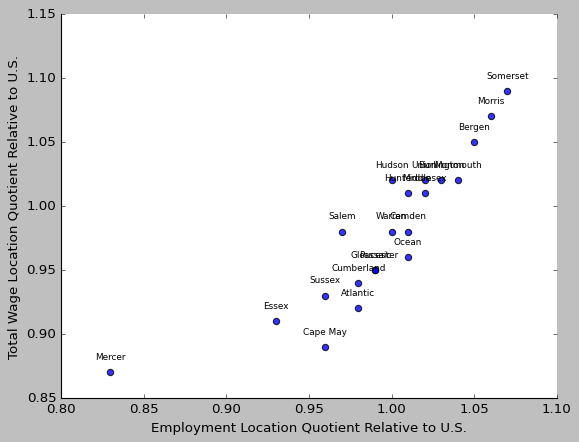

In [77]:
# Employment Location Quotient Relative to U.S. vs Total Wage Location Quotient Relative to U.S.

#from matplotlib import pyplot as plt
#df4_table.plot(kind='scatter', x='Employment Location Quotient Relative to U.S.', y='Total Wage Location Quotient Relative to U.S.', s=32, alpha=.8)
#plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt

ax = df4_table.plot(kind='scatter', x='Employment Location Quotient Relative to U.S.', y='Total Wage Location Quotient Relative to U.S.', s=32, alpha=.8)

# Add county labels
for i, row in df4_table.iterrows():
    plt.text(row['Employment Location Quotient Relative to U.S.'], row['Total Wage Location Quotient Relative to U.S.']+ 0.01, row['County'], fontsize=8, ha='center')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [78]:
# Realize merge > df4_table and mergedOuter
mergedOuter_final = pd.merge(mergedOuter, df4_table, on="County", how="left")
mergedOuter_final.head()

,County,Employment,Unemployment,Population,Gross Domestic Product,Median Income,State,BA2005,BA2006,BA2007,...,BA2023,_merge,GDP per capita,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
0,Atlantic,100709,12.5,266105,12593490,62678,New Jersey,2281,2314,2336,...,3885,both,47.325266,"6,911","105,030","5,692,663,077","1,042","54,200",0.98,0.92
1,Bergen,426341,7.6,930390,70158193,107971,New Jersey,11218,11633,11833,...,18508,both,75.407295,"35,098","392,497","31,115,189,292","1,525","79,275",1.05,1.05
2,Burlington,210681,6.6,445702,25725252,88443,New Jersey,3816,3904,4103,...,7703,both,57.718502,"11,926","183,809","12,681,241,373","1,327","68,992",1.03,1.02
3,Camden,229229,8.2,506738,23558717,73168,New Jersey,3953,4322,4398,...,8225,both,46.490922,"13,387","176,138","11,421,783,386","1,247","64,845",1.01,0.98
4,Cape May,39046,12.6,93086,5070716,66565,New Jersey,1080,1002,962,...,1311,both,54.473455,"3,877","34,725","1,535,183,337",850,"44,209",0.96,0.89


In [79]:
mergedOuter_final[[
    "County",
    "Employment",
    "Unemployment",
    "GDP per capita",
    "Median Income",
    "BA2023",
    "Employment Location Quotient Relative to U.S.",
    "Total Wage Location Quotient Relative to U.S."
]][:21].style.background_gradient(cmap='Blues').format(precision=1)


,County,Employment,Unemployment,GDP per capita,Median Income,BA2023,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
0,Atlantic,100709,12.5,47.3,62678,3885,1.0,0.9
1,Bergen,426341,7.6,75.4,107971,18508,1.1,1.1
2,Burlington,210681,6.6,57.7,88443,7703,1.0,1.0
3,Camden,229229,8.2,46.5,73168,8225,1.0,1.0
4,Cape May,39046,12.6,54.5,66565,1311,1.0,0.9
5,Cumberland,58005,9.7,39.5,54179,1982,1.0,0.9
6,Essex,326411,9.9,65.5,64522,18476,0.9,0.9
7,Gloucester,136373,7.5,48.1,87996,3977,1.0,0.9
8,Hudson,317844,8.7,65.4,77738,14321,1.0,1.0
9,Hunterdon,57934,5.9,54.6,117275,1674,1.0,1.0


## Location Quotients and Business Applications

This chart shows how unemployment and business applications relate to each county's economic specialization, using Location Quotients.

- Color: Employment Location Quotient Relative to U.S.
- Bubble Size: Total Wage Location Quotient Relative to U.S.
- DataFrame: mergedOuter_final

<Figure size 800x480 with 0 Axes>

Text(12.5, 3885, 'Atlantic')

Text(7.6, 18508, 'Bergen')

Text(6.6, 7703, 'Burlington')

Text(8.2, 8225, 'Camden')

Text(12.6, 1311, 'Cape May')

Text(9.7, 1982, 'Cumberland')

Text(9.9, 18476, 'Essex')

Text(7.5, 3977, 'Gloucester')

Text(8.7, 14321, 'Hudson')

Text(5.9, 1674, 'Hunterdon')

Text(6.3, 6140, 'Mercer')

Text(7.0, 14685, 'Middlesex')

Text(6.9, 10695, 'Monmouth')

Text(6.3, 7694, 'Morris')

Text(7.5, 10317, 'Ocean')

Text(10.4, 10025, 'Passaic')

Text(8.6, 735, 'Salem')

Text(6.3, 5518, 'Somerset')

Text(7.6, 1842, 'Sussex')

Text(8.2, 11045, 'Union')

Text(7.1, 1359, 'Warren')

Text(0.5, 0, 'Unemployment Rate (%)')

Text(0, 0.5, 'Business Applications (2023)')

Text(0.5, 1.0, 'Business Applications vs Unemployment (Bubble = Wage Quotient, Color = Employment Quotient)')

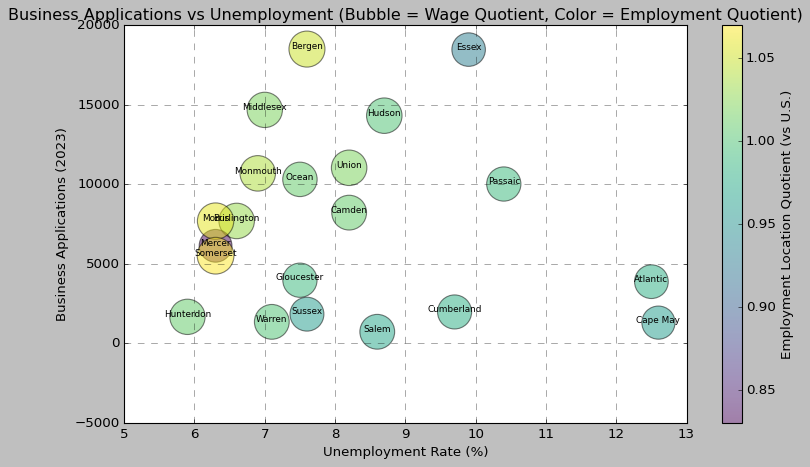

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    mergedOuter_final["Unemployment"],
    mergedOuter_final["BA2023"],
    s=mergedOuter_final["Total Wage Location Quotient Relative to U.S."] * 1000,  # scale up if needed
    alpha=0.5,
    c=mergedOuter_final["Employment Location Quotient Relative to U.S."],
    cmap='viridis'
)

# Add county labels
for i, row in mergedOuter_final.iterrows():
    plt.text(row["Unemployment"], row["BA2023"], row["County"], fontsize=8, ha='center')

# Labels and title
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Business Applications (2023)")
plt.title("Business Applications vs Unemployment (Bubble = Wage Quotient, Color = Employment Quotient)")
plt.colorbar(label="Employment Location Quotient (vs U.S.)")

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Explanation>

Counties with LQ > 1.0 in both employment and wages:

Bergen, Burlington, Hunterdon, Middlesex, Monmouth, Morris, Somerset, Union

> These counties have a higher concentration of private-sector jobs and wages than the U.S. average.



Counties with LQ < 1.0 in both indicators:

Cape May, Atlantic, Cumberland, Essex, Mercer, Sussex.
Also Gloucester, Passaic and Salem.

> These are below national average, Indicating potential targets for entrepreneurship support or economic development programs.



From this list, Essex County has high level of Business application.


Conclusion>
These findings reveal that several New Jersey counties—including Atlantic, Cape May, Cumberland, Essex, Gloucester, Mercer, Passaic, Salem, and Sussex—have employment and wage location quotients below the national average. This suggests a weaker concentration of private-sector activity in these areas. Despite this, many of these counties still show notable levels of business applications (BA2023), indicating that entrepreneurship may be driven by necessity in regions with fewer traditional employment opportunities. These counties represent strategic targets for state-supported entrepreneurship initiatives, as strengthening local business formation could help compensate for lower private-sector presence and contribute to broader economic development.

##LQ based on Educational Industry

In [81]:
# Filter df4 for New Jersey, Private Ownership, and specific industry (1025 Education and health services), excluding undefined areas
df4_filtered2 = df4[
    (df4["Area Type"] == "County") &
    (df4["St Name"] == "New Jersey") &
    (df4["Ownership"] == "Private") &
    (df4["Industry"] == "1025 Education and health services") &
    (df4["Area"] != "Unknown Or Undefined, New Jersey")
]

# Rename column Area to County
df4_filtered2 = df4_filtered2.rename(columns={"Area": "County"})

# Replace long county names with simplified versions
df4_filtered2["County"] = df4_filtered2["County"].replace({
    "Atlantic County, New Jersey": "Atlantic",
    "Bergen County, New Jersey": "Bergen",
    "Burlington County, New Jersey": "Burlington",
    "Camden County, New Jersey": "Camden",
    "Cape May County, New Jersey": "Cape May",
    "Cumberland County, New Jersey": "Cumberland",
    "Essex County, New Jersey": "Essex",
    "Gloucester County, New Jersey": "Gloucester",
    "Hudson County, New Jersey": "Hudson",
    "Hunterdon County, New Jersey": "Hunterdon",
    "Mercer County, New Jersey": "Mercer",
    "Middlesex County, New Jersey": "Middlesex",
    "Monmouth County, New Jersey": "Monmouth",
    "Morris County, New Jersey": "Morris",
    "Ocean County, New Jersey": "Ocean",
    "Passaic County, New Jersey": "Passaic",
    "Salem County, New Jersey": "Salem",
    "Somerset County, New Jersey": "Somerset",
    "Sussex County, New Jersey": "Sussex",
    "Union County, New Jersey": "Union",
    "Warren County, New Jersey": "Warren"
})


Scatter plot code using df4_filtered2 (already filtered for "1025 Education and health services", private sector, and New Jersey), showing Employment Location Quotient vs Total Wage Location Quotient with county names as labels:

<Figure size 800x480 with 0 Axes>

Text(1.03, 1.33, 'Atlantic')

Text(1.29, 1.3800000000000001, 'Bergen')

Text(1.06, 1.15, 'Burlington')

Text(1.52, 1.76, 'Camden')

Text(0.64, 0.88, 'Cape May')

Text(1.12, 1.39, 'Cumberland')

Text(1.11, 0.99, 'Essex')

Text(0.9, 1.04, 'Gloucester')

Text(0.83, 0.58, 'Hudson')

Text(0.95, 0.97, 'Hunterdon')

Text(1.03, 1.07, 'Mercer')

Text(0.85, 0.78, 'Middlesex')

Text(1.37, 1.61, 'Monmouth')

Text(1.03, 0.89, 'Morris')

Text(1.64, 1.8800000000000001, 'Ocean')

Text(1.17, 1.24, 'Passaic')

Text(0.81, 0.98, 'Salem')

Text(0.87, 0.59, 'Somerset')

Text(0.99, 1.12, 'Sussex')

Text(1.02, 0.91, 'Union')

Text(1.21, 1.37, 'Warren')

Text(0.5, 0, 'Employment Location Quotient (vs U.S.)')

Text(0, 0.5, 'Total Wage Location Quotient (vs U.S.)')

Text(0.5, 1.0, 'Education & Health Services LQ by County (Private Sector - NJ)')

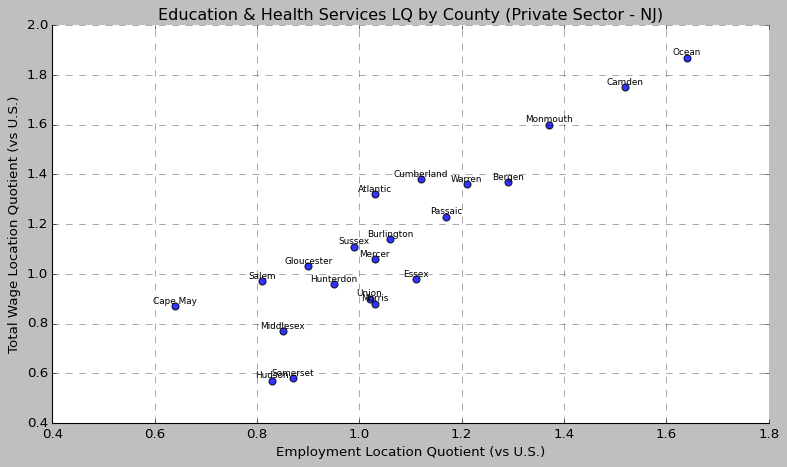

In [82]:
from matplotlib import pyplot as plt

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df4_filtered2["Employment Location Quotient Relative to U.S."],
    df4_filtered2["Total Wage Location Quotient Relative to U.S."],
    s=40,
    alpha=0.8
)

# Add county labels
for i, row in df4_filtered2.iterrows():
    plt.text(
        row["Employment Location Quotient Relative to U.S."],
        row["Total Wage Location Quotient Relative to U.S."] + 0.01,
        row["County"],
        fontsize=8,
        ha='center'
    )

# Format plot
plt.xlabel("Employment Location Quotient (vs U.S.)")
plt.ylabel("Total Wage Location Quotient (vs U.S.)")
plt.title("Education & Health Services LQ by County (Private Sector - NJ)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()


Explanations> Cape May, Somerset, and Hudson counties have location quotients below 1.0 for both employment and total wages in the education and health services sector, indicating a lower-than-average concentration of private sector activity in this field compared to the national level. This suggests these counties may face greater challenges in local industry development or access to related services. In contrast, Ocean, Camden, and Monmouth counties show LQs above 1.0 in both indicators, reflecting a stronger local presence of this sector and potentially fewer barriers to employment and wage growth within it. These differences highlight where targeted support or investment may be most needed.

In [83]:
# Realize merge > df4_table and mergedOuter
mergedOuter_final2 = pd.merge(mergedOuter, df4_filtered2 , on="County", how="left")
mergedOuter_final.head()

# Display selected columns with styling
mergedOuter_final2[[
    "County",
    "Employment",
    "Unemployment",
    "GDP per capita",
    "Median Income",
    "BA2023",
    "Employment Location Quotient Relative to U.S.",
    "Total Wage Location Quotient Relative to U.S."
]][:21].style.background_gradient(cmap='Blues').format(precision=1)


,County,Employment,Unemployment,Population,Gross Domestic Product,Median Income,State,BA2005,BA2006,BA2007,...,BA2023,_merge,GDP per capita,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
0,Atlantic,100709,12.5,266105,12593490,62678,New Jersey,2281,2314,2336,...,3885,both,47.325266,"6,911","105,030","5,692,663,077","1,042","54,200",0.98,0.92
1,Bergen,426341,7.6,930390,70158193,107971,New Jersey,11218,11633,11833,...,18508,both,75.407295,"35,098","392,497","31,115,189,292","1,525","79,275",1.05,1.05
2,Burlington,210681,6.6,445702,25725252,88443,New Jersey,3816,3904,4103,...,7703,both,57.718502,"11,926","183,809","12,681,241,373","1,327","68,992",1.03,1.02
3,Camden,229229,8.2,506738,23558717,73168,New Jersey,3953,4322,4398,...,8225,both,46.490922,"13,387","176,138","11,421,783,386","1,247","64,845",1.01,0.98
4,Cape May,39046,12.6,93086,5070716,66565,New Jersey,1080,1002,962,...,1311,both,54.473455,"3,877","34,725","1,535,183,337",850,"44,209",0.96,0.89


,County,Employment,Unemployment,GDP per capita,Median Income,BA2023,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
0,Atlantic,100709,12.5,47.3,62678,3885,1.0,1.3
1,Bergen,426341,7.6,75.4,107971,18508,1.3,1.4
2,Burlington,210681,6.6,57.7,88443,7703,1.1,1.1
3,Camden,229229,8.2,46.5,73168,8225,1.5,1.8
4,Cape May,39046,12.6,54.5,66565,1311,0.6,0.9
5,Cumberland,58005,9.7,39.5,54179,1982,1.1,1.4
6,Essex,326411,9.9,65.5,64522,18476,1.1,1.0
7,Gloucester,136373,7.5,48.1,87996,3977,0.9,1.0
8,Hudson,317844,8.7,65.4,77738,14321,0.8,0.6
9,Hunterdon,57934,5.9,54.6,117275,1674,0.9,1.0


<Figure size 800x480 with 0 Axes>

Text(12.5, 3885, 'Atlantic')

Text(7.6, 18508, 'Bergen')

Text(6.6, 7703, 'Burlington')

Text(8.2, 8225, 'Camden')

Text(12.6, 1311, 'Cape May')

Text(9.7, 1982, 'Cumberland')

Text(9.9, 18476, 'Essex')

Text(7.5, 3977, 'Gloucester')

Text(8.7, 14321, 'Hudson')

Text(5.9, 1674, 'Hunterdon')

Text(6.3, 6140, 'Mercer')

Text(7.0, 14685, 'Middlesex')

Text(6.9, 10695, 'Monmouth')

Text(6.3, 7694, 'Morris')

Text(7.5, 10317, 'Ocean')

Text(10.4, 10025, 'Passaic')

Text(8.6, 735, 'Salem')

Text(6.3, 5518, 'Somerset')

Text(7.6, 1842, 'Sussex')

Text(8.2, 11045, 'Union')

Text(7.1, 1359, 'Warren')

Text(0.5, 0, 'Unemployment Rate (%)')

Text(0, 0.5, 'Business Applications (2023)')

Text(0.5, 1.0, 'Business Applications vs Unemployment (Bubble = Wage Quotient, Color = Employment Quotient)')

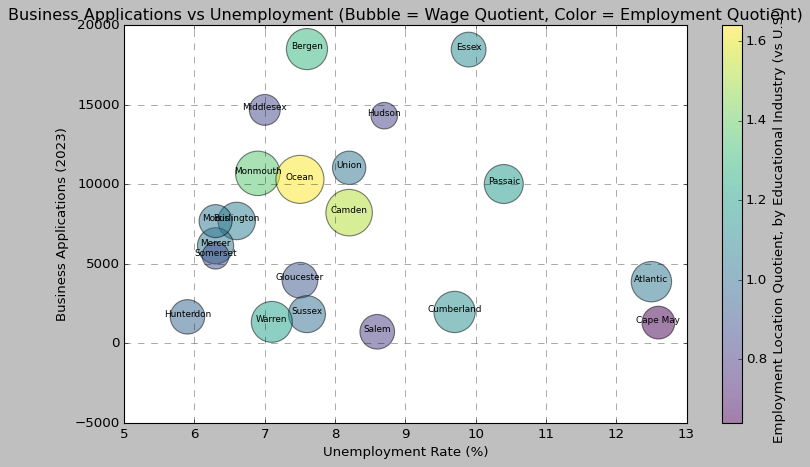

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    mergedOuter_final2["Unemployment"],
    mergedOuter_final2["BA2023"],
    s=mergedOuter_final2["Total Wage Location Quotient Relative to U.S."] * 1000,  # scale up if needed
    alpha=0.5,
    c=mergedOuter_final2["Employment Location Quotient Relative to U.S."],
    cmap='viridis'
)

# Add county labels
for i, row in mergedOuter_final2.iterrows():
    plt.text(row["Unemployment"], row["BA2023"], row["County"], fontsize=8, ha='center')

# Labels and title
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Business Applications (2023)")
plt.title("Business Applications vs Unemployment (Bubble = Wage Quotient, Color = Employment Quotient)")
plt.colorbar(label="Employment Location Quotient, by Educational Industry (vs U.S.)")

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Conclusion>

1. Camden and Ocean counties show the highest employment and wage location quotients in the education and health services sector, suggesting a strong local presence of this industry.  

2. Cape May, Hudson, and Somerset counties have LQs below 1.0 in both employment and wages, indicating a lower concentration of education-related private employment and earnings compared to national levels.  

3. Bergen and Monmouth demonstrate high LQs in both indicators, reflecting strong regional capacity and opportunities in the education sector.  

4. Counties like Middlesex and Salem have employment LQs below 1.0, which may suggest room for improvement in job creation within the private education and health services industry.  

5. While Essex and Cumberland have moderate GDP per capita, their LQs are above 1.0, meaning these counties are active in the education sector despite broader economic challenges.  

6. Gloucester, Hunterdon, and Morris counties are near or just below the national benchmark (LQ ≈ 1.0), indicating average alignment with national employment and wage trends in this field.  

7. The high LQs in Atlantic and Mercer suggest strong wage performance in education despite moderate unemployment and GDP levels.  

8. Somerset, with high GDP per capita, shows low LQs in education services, possibly reflecting a stronger focus in other sectors.  

9. Passaic and Warren exhibit above-average LQs, which may reflect active investment or demand for education-related services in these counties.  

10. Overall, LQ analysis helps identify counties where educational and health services are economic strengths (e.g., Ocean, Camden) versus those with potential for strategic development (e.g., Hudson, Cape May).

##Conclusion
The results support the idea that counties with higher GDP generally have more business applications. For example, Bergen and Middlesex have strong economies and also show high levels of new business formation. However, some counties with lower GDP—like Cumberland, Cape May, and Atlantic—also show business activity, possibly because people are starting businesses out of need. Atlantic County, known for tourism, may face unique economic challenges, especially after events like COVID-19, which affected the hospitality sector.  

When looking at the education and health services industry, the location quotients show that counties like Camden, Ocean, and Monmouth have a strong presence in this sector, while others like Cape May, Hudson, and Somerset are below the national average. These results suggest that counties with lower performance in key industries and higher unemployment—such as Cape May and Salem—could benefit from targeted entrepreneurship programs, training, and support services to help create new jobs and stimulate local economic growth.

##References
Acs, Z. J., Desai, S., & Hessels, J. (2008). *Entrepreneurship, economic development and institutions*. Small Business Economics, 31(3), 219–234.

Glaeser, E. L., Kerr, W. R., & Kerr, S. P. (2010). *What makes a city entrepreneurial?*. Journal of Urban Economics, 67(1), 90–108.

Federal Reserve Bank of St. Louis. (2012). *The relationships among changes in GDP, employment, and unemployment: This time it’s different*.

New Jersey Small Business Development Center (NJSBDC). (n.d.). *Annual Reports*.

New Jersey Department of Labor and Workforce Development. (n.d.). *SkillUp NJ*.

APEX Accelerator Program – New Jersey Institute of Technology. (n.d.). *PTAC Services*.

U.S. Census Bureau. (2025). *Business Formation Statistics – County Data*.

New Jersey Economic Development Authority. (2025). *NJCountyData.xlsx*.

Google Sheets (User Upload). (2025). *NJ GDP, population, and business data*.

New Jersey Labor Market Information. (2025). *Quarterly Census of Employment and Wages*.

##To consider in next reseach

Try Multiple regression> Try to find if Business Formation as independent variable have a cause of GDP development.

###Observations
North Jersey Counties:  
Bergen  
Essex  
Hudson  
Morris  
Passaic  
Sussex  
Union  
Warren  
Somerset  
Hunterdon  

South Jersey Counties:  
Atlantic  
Burlington  
Camden  
Cape May  
Cumberland  
Gloucester  
Ocean  
Salem  

Central Jersey Counties (optional):  
Mercer  
Middlesex  
Monmouth

Sources>


https://indicators.kauffman.org/reports


https://indicators.kauffman.org/wp-content/uploads/sites/2/2022/10/Entrepreneurial-Jobs-Indicators-National-Report-October-2022.pdf

Other sources to consider in future research>

Decker, R., Haltiwanger, J., Jarmin, R., & Miranda, J. (2014). The role of entrepreneurship in U.S. job creation and economic dynamism.
Journal of Economic Perspectives, 28(3), 3–24.
Ewing Marion Kauffman Foundation. (2022a). 2021 New employer business indicators in the United States: National and state trends.
Kauffman Indicators of Entrepreneurship, Kansas City, Missouri.
 Ewing Marion Kauffman Foundation. (2022b). Measuring job trends among entrepreneurial and older firms: A methods note,  
Ewing Marion Kauffman Foundation, Kansas City, Missouri.
Fairlie, R. (2022). National report on early-stage entrepreneurship in the United States: 2021. Kauffman Indicators of Entrepreneurship,
Ewing Marion Kauffman Foundation, Kansas City, Missouri.
 Kane, T. (2010). The importance of startups in job creation and job destruction. Ewing Marion Kauffman Foundation,  
Kansas City, Missouri.
 Mass Economics analysis of Business Formation Statistics (BFS) from the U.S. Census Bureau, Seasonally Adjusted Release,  
2019–2021, https://www.census.gov/econ/bfs/index.html.
Reedy, E. & Litan, R. (2011). Starting smaller; staying smaller: America’s slow leak in job creation. Ewing Marion Kauffman Foundation,
Kansas City, Missouri.